In [137]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import math

In [138]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import mean_squared_error as rmse
import pickle # to save the model

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score ,roc_auc_score as auc, accuracy_score as acc, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve,average_precision_score,average_precision_score as aps,log_loss as ll

from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.simplefilter(action='ignore', category=FitFailedWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [139]:
from sklearn.tree import DecisionTreeRegressor as dtr,export_graphviz
from sklearn.model_selection import GridSearchCV as gs, RandomizedSearchCV as rs
from sklearn.metrics import make_scorer
#import graphviz

## random state

In [140]:
r=6

In [141]:
data = pd.read_csv('spotify_data.csv')
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


## Missing Value

In [142]:
data.isnull().sum()

Position        0
Track Name    657
Artist        657
Streams         0
URL             8
Date            0
Region          0
dtype: int64

In [143]:
data.dropna(inplace=True)

## Preprocessing

### track_names

In [144]:
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [145]:
le = preprocessing.LabelEncoder()
#data['Track Name']=le.fit_transform(data['Track Name'])
data['Artist']=le.fit_transform(data['Artist'])
#data['Region']=le.fit_transform(data['Region'])

removing url column

In [146]:
data.drop(['URL'], axis=1,inplace=True)

In [147]:
data.head()

,Position,Track Name,Artist,Streams,Date,Region
0,1,Reggaetón Lento (Bailemos),897,19272,2017-01-01,ec
1,2,Chantaje,5194,19270,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),6331,15761,2017-01-01,ec
3,4,Vente Pa' Ca,4854,14954,2017-01-01,ec
4,5,Safari,2523,14269,2017-01-01,ec


## Date

In [148]:
data['Date'].max(), data['Date'].min()

('2018-01-09', '2017-01-01')

In [149]:
data['Date'] = pd.to_datetime(data['Date'], format= '%Y-%m-%d')
data.dtypes

Position               int64
Track Name            object
Artist                 int32
Streams                int64
Date          datetime64[ns]
Region                object
dtype: object

In [150]:
data['Date'].max(), data['Date'].min()

(Timestamp('2018-01-09 00:00:00'), Timestamp('2017-01-01 00:00:00'))

### extracting

year

In [151]:
data['Date'].dt.year

0          2017
1          2017
2          2017
3          2017
4          2017
           ... 
3441192    2018
3441193    2018
3441194    2018
3441195    2018
3441196    2018
Name: Date, Length: 3440540, dtype: int64

In [152]:
data['Date'].dt.year.value_counts()

2017    3355829
2018      84711
Name: Date, dtype: int64

month

In [153]:
data['Date'].dt.month

0          1
1          1
2          1
3          1
4          1
          ..
3441192    1
3441193    1
3441194    1
3441195    1
3441196    1
Name: Date, Length: 3440540, dtype: int64

In [154]:
data['Date'].dt.month.value_counts()

1     361156
12    297611
7     290305
10    289677
8     289439
3     285994
11    280138
9     280084
4     274391
6     269533
5     268020
2     254192
Name: Date, dtype: int64

day of month

In [155]:
data['Date'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
3441192    9
3441193    9
3441194    9
3441195    9
3441196    9
Name: Date, Length: 3440540, dtype: int64

In [156]:
data['Date'].dt.day.value_counts()[0:5]

8    120677
9    120677
7    120522
5    120435
4    120404
Name: Date, dtype: int64

In [157]:
len(data['Date'].dt.day.value_counts())

31

day of year

In [158]:
data['Date'].dt.dayofyear

0          1
1          1
2          1
3          1
4          1
          ..
3441192    9
3441193    9
3441194    9
3441195    9
3441196    9
Name: Date, Length: 3440540, dtype: int64

In [159]:
data['Date'].dt.dayofyear.value_counts()

5     18432
6     18402
9     18389
8     18220
4     18197
      ...  
23     8891
29     8889
11     8875
10     8840
15     8829
Name: Date, Length: 362, dtype: int64

In [160]:
len(data['Date'].dt.dayofyear.value_counts())

362

day of week

In [161]:
data['Date'].dt.dayofweek

0          6
1          6
2          6
3          6
4          6
          ..
3441192    1
3441193    1
3441194    1
3441195    1
3441196    1
Name: Date, Length: 3440540, dtype: int64

In [162]:
data['Date'].dt.dayofweek.value_counts()

0    497277
5    493745
3    493319
1    491527
6    491422
4    490420
2    482830
Name: Date, dtype: int64

day of week name

In [163]:
data['Date'].dt.day_name()

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
3441192    Tuesday
3441193    Tuesday
3441194    Tuesday
3441195    Tuesday
3441196    Tuesday
Name: Date, Length: 3440540, dtype: object

## Put it all together

In [164]:
date_data = pd.DataFrame({"Year": data['Date'].dt.year,
              "Month": data['Date'].dt.month,
              "Day Of Month": data['Date'].dt.day,
              "Day Of Year": data['Date'].dt.dayofyear,
              "Day Of Week": data['Date'].dt.dayofweek,
              "Day Of Week Name": data['Date'].dt.day_name()
             })
date_data.head()

,Year,Month,Day Of Month,Day Of Year,Day Of Week,Day Of Week Name
0,2017,1,1,1,6,Sunday
1,2017,1,1,1,6,Sunday
2,2017,1,1,1,6,Sunday
3,2017,1,1,1,6,Sunday
4,2017,1,1,1,6,Sunday


In [165]:
data.shape

(3440540, 6)

In [166]:
date_data.shape

(3440540, 6)

joining date_data to main data

In [167]:
data=data.join(date_data.set_index(data.index), on=data.index).copy()

removing date column

# removing 2018 data

In [168]:
data=data[data['Year']==2017].copy()

In [169]:
data.drop(['Date'], axis=1,inplace=True)

In [170]:
data.drop(['Day Of Week Name'], axis=1,inplace=True)

In [171]:
data.head()

,Position,Track Name,Artist,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,Reggaetón Lento (Bailemos),897,19272,ec,2017,1,1,1,6
1,2,Chantaje,5194,19270,ec,2017,1,1,1,6
2,3,Otra Vez (feat. J Balvin),6331,15761,ec,2017,1,1,1,6
3,4,Vente Pa' Ca,4854,14954,ec,2017,1,1,1,6
4,5,Safari,2523,14269,ec,2017,1,1,1,6


In [172]:
data.shape

(3355829, 10)

basic analysis

positions are rankings of tracks from 1 to 200

In [173]:
data['Position'].value_counts()

1      19201
7      19194
6      19193
5      19189
8      19188
       ...  
196    14075
197    14061
198    14049
199    14039
200    14030
Name: Position, Length: 200, dtype: int64

In [174]:
len(data['Position'].value_counts())

200

postion 1 

In [175]:
data[data['Position']==1]['Track Name'].value_counts()

Shape of You                          3630
Despacito - Remix                     2342
rockstar                              1607
Despacito (Featuring Daddy Yankee)    1560
Mi Gente                              1180
                                      ... 
Helwa                                    1
Bimbi                                    1
Dexter                                   1
Nössö                                    1
Gasell                                   1
Name: Track Name, Length: 250, dtype: int64

on postion 1 we have 256 tracks for example

In [176]:
len(data[data['Position']==1]['Track Name'].value_counts())

250

position 200

In [177]:
data[data['Position']==200]['Track Name'].value_counts()

Wonderwall - Remastered            70
Let Her Go                         60
Stay With Me                       60
Love Yourself                      53
Cake By The Ocean                  49
                                   ..
Packets immer noch                  1
Ziel Halal                          1
Wannsee                             1
Rudolph, the Red-Nosed Reindeer     1
偉大的渺小                               1
Name: Track Name, Length: 4076, dtype: int64

 on postion 200 we have 4151 tracks for example

In [178]:
len(data[data['Position']==200]['Track Name'].value_counts())

4076

track name and artist

In [179]:
data['Track Name'].value_counts()

Shape of You                                        18901
Believer                                            16393
Despacito (Featuring Daddy Yankee)                  15985
Rockabye (feat. Sean Paul & Anne-Marie)             15908
Something Just Like This                            15765
                                                    ...  
Bersærkergang                                           1
Mellemspil - Pt. 2                                      1
Elskovssafari                                           1
Om                                                      1
Midnight Rider - Recorded at Spotify Studios NYC        1
Name: Track Name, Length: 18286, dtype: int64

In [180]:
len(data['Track Name'].value_counts())

18286

In [181]:
data[data['Track Name']==1]['Artist']

Series([], Name: Artist, dtype: int32)

In [182]:
data[data['Track Name']==200]['Artist']

Series([], Name: Artist, dtype: int32)

note for each track name there is one and only one artist so each track corresponds to one artist so for prediction artist variable is not required, for eda visualization and data analysis though we will require artist name and trck name

## analysis

In [183]:
data.head()

,Position,Track Name,Artist,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,Reggaetón Lento (Bailemos),897,19272,ec,2017,1,1,1,6
1,2,Chantaje,5194,19270,ec,2017,1,1,1,6
2,3,Otra Vez (feat. J Balvin),6331,15761,ec,2017,1,1,1,6
3,4,Vente Pa' Ca,4854,14954,ec,2017,1,1,1,6
4,5,Safari,2523,14269,ec,2017,1,1,1,6


# Months vs tracks

In [184]:
track_month_table=data.pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

track_month_table.fillna(0, inplace=True)

track_month_table.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Track Name,,,,,,,,,,,,
"""All That Is or Ever Was or Ever Will Be""",7311.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Read All About It, Pt. III""",0.0,34199.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22826.0,0.0,0.0
#99,31826.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Askip,296862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Biziz - feat. Lil Bege,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271192.0,132399.0,0.0,0.0


In [185]:
track_month=pd.DataFrame(columns=['Month','Track with most streams','No of Streams']).copy()

for i in track_month:
    
    track_month[i]=np.zeros(12, dtype=int)
    
track_month

,Month,Track with most streams,No of Streams
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [186]:
index=0

for i in track_month_table:
    
    track_month['Month'][index]=i
    
    track_month['No of Streams'][index]=sorted(track_month_table.iloc[:,index],reverse=True)[0]
    
    track_month['Track with most streams'][index]= track_month_table.index[track_month_table.iloc[:,index]==track_month['No of Streams'][index]].values[0]
    
    index=index+1

In [187]:
track_month

,Month,Track with most streams,No of Streams
0,1,Shape of You,366007170
1,2,Shape of You,407227623
2,3,Shape of You,469111248
3,4,Shape of You,340035736
4,5,Despacito - Remix,389445999
5,6,Despacito - Remix,384304420
6,7,Despacito - Remix,324530644
7,8,Mi Gente,281206000
8,9,Mi Gente,237994936
9,10,rockstar,391652771


creating a list of Tracks with most streams on a particular month and creating a column for their respective streams each month

In [188]:
tracks=track_month['Track with most streams'].value_counts().index.tolist()

for i in tracks:
    
    track_month[i]=track_month_table.loc[i].tolist()
    


In [189]:
track_month

,Month,Track with most streams,No of Streams,Shape of You,Despacito - Remix,rockstar,Mi Gente
0,1,Shape of You,366007170,366007170.0,0.0,0.0,0.0
1,2,Shape of You,407227623,407227623.0,0.0,0.0,0.0
2,3,Shape of You,469111248,469111248.0,0.0,0.0,0.0
3,4,Shape of You,340035736,340035736.0,153891409.0,0.0,0.0
4,5,Despacito - Remix,389445999,269169687.0,389445999.0,0.0,0.0
5,6,Despacito - Remix,384304420,219295280.0,384304420.0,0.0,2322165.0
6,7,Despacito - Remix,324530644,199073911.0,324530644.0,0.0,201584493.0
7,8,Mi Gente,281206000,166852553.0,218671024.0,0.0,281206000.0
8,9,Mi Gente,237994936,137980741.0,126778308.0,182502201.0,237994936.0
9,10,rockstar,391652771,127884795.0,88654326.0,391652771.0,150627119.0


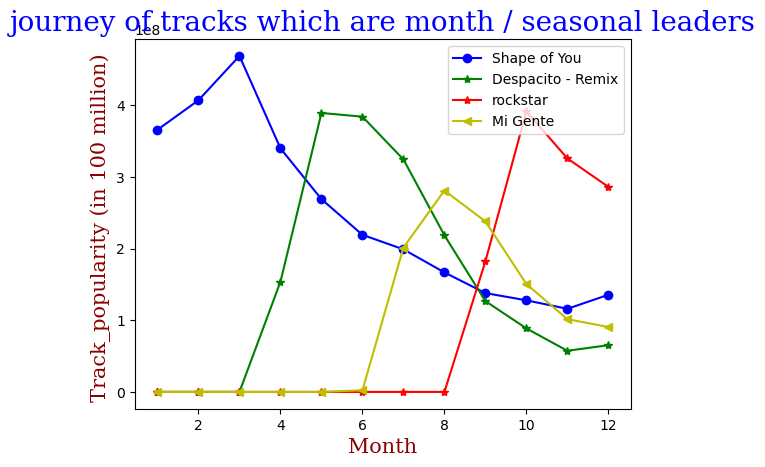

In [190]:
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("journey of tracks which are month / seasonal leaders", fontdict = font1)

 # X label
 plt.xlabel("Month", fontdict = font2)

 # Y label
 plt.ylabel("Track_popularity (in 100 million) ", fontdict = font2)


    
 plt.plot(track_month['Month'], track_month['Shape of You'], 'bo-',label='Shape of You')
    
 plt.plot(track_month['Month'], track_month['Despacito - Remix'], 'g*-', label='Despacito - Remix')
    
 plt.plot(track_month['Month'], track_month['rockstar'], 'r*-', label='rockstar')

 plt.plot(track_month['Month'], track_month['Mi Gente'], 'y<-', label='Mi Gente')
    

 plt.legend()

 
 # show the plot
 plt.show()

### top 10 songs each month

#### month 1

In [191]:
month1_track_analysis=data[data['Month']==1].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month1_track_analysis.fillna(0, inplace=True)

month1_track_analysis.head()

Month,1
Track Name,
"""All That Is or Ever Was or Ever Will Be""",7311
#99,31826
#Askip,296862
#HEY!,46013
'Till I Collapse,20041348


In [192]:
month1_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month1_top10['No of Streams']=sorted(month1_track_analysis[1],reverse=True)[:10]

for i in range(len(month1_top10['No of Streams'])):
    
    month1_top10['top 10 tracks'][i]=month1_track_analysis.index[month1_track_analysis[1] == month1_top10['No of Streams'][i]].values[0]

month1_top10

,No of Streams,top 10 tracks
0,366007170,Shape of You
1,205431230,Starboy
2,204117591,Castle on the Hill
3,197597595,I Don’t Wanna Live Forever (Fifty Shades Darke...
4,192499556,Rockabye (feat. Sean Paul & Anne-Marie)
5,177079524,Closer
6,160604187,Say You Won't Let Go
7,156120058,Don't Wanna Know
8,155251962,I Feel It Coming
9,149075393,Fake Love


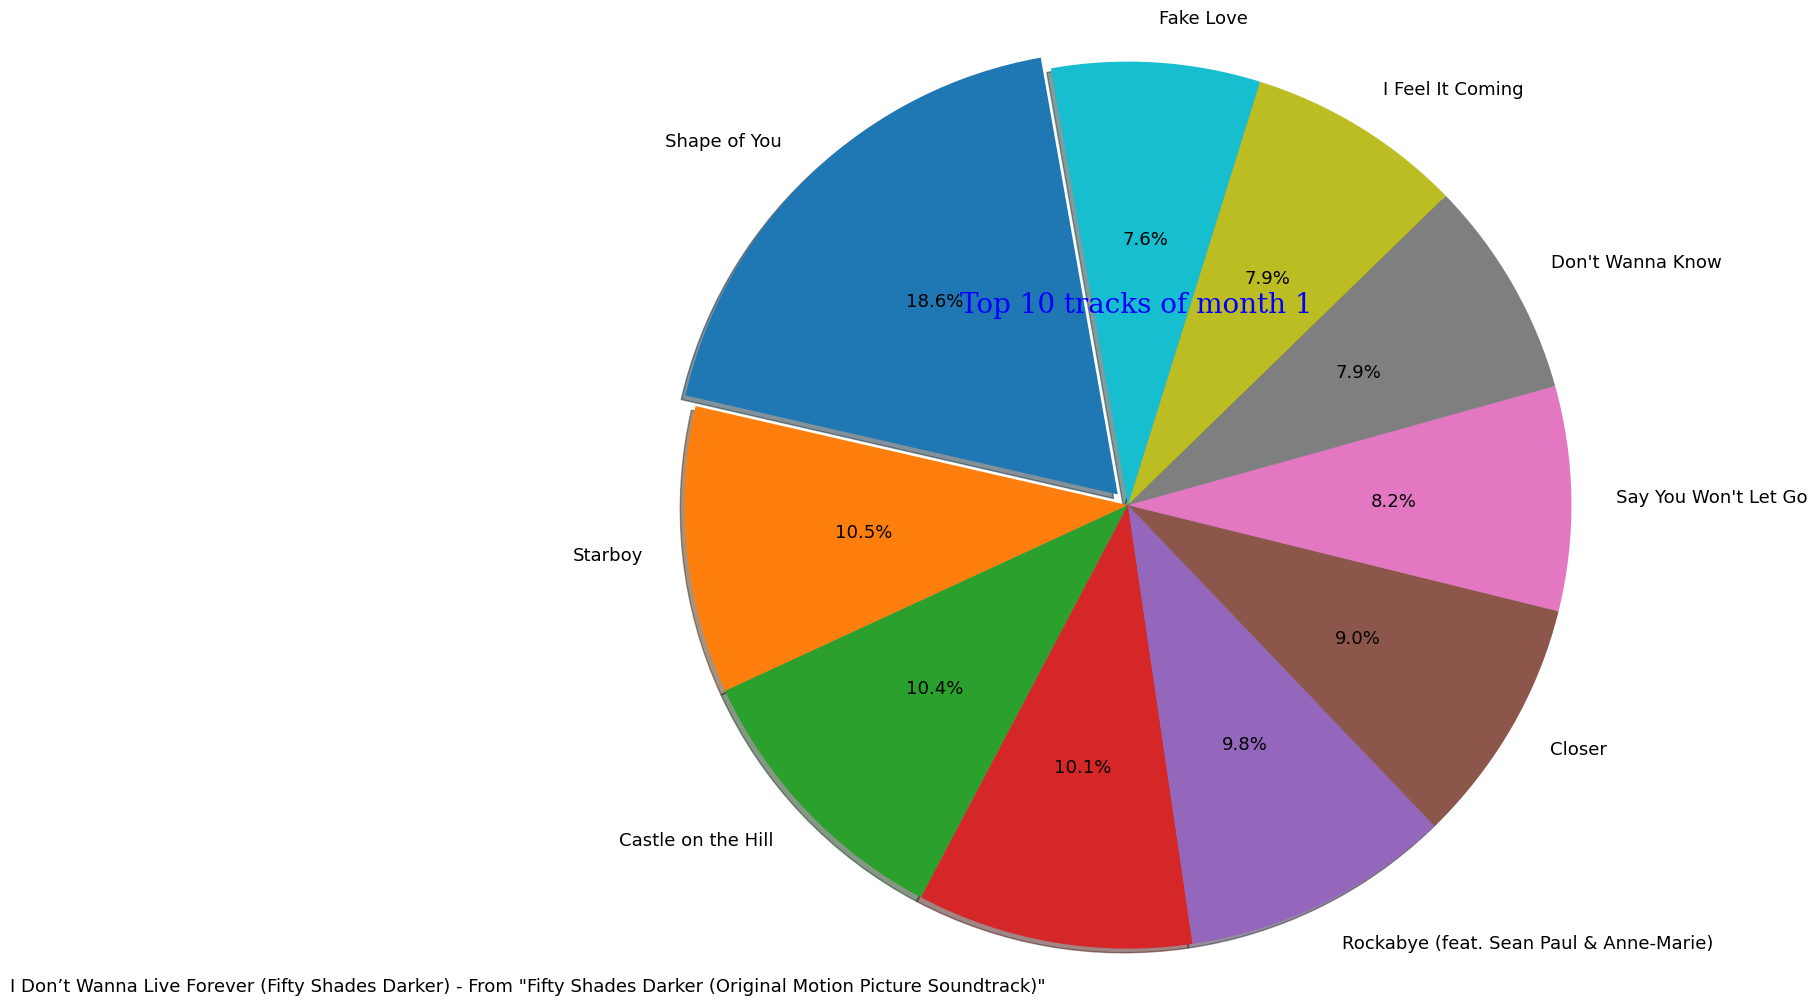

In [193]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 1", fontdict = font1, loc = 'right')


 plt.pie(month1_top10['No of Streams'], labels = month1_top10['top 10 tracks'], textprops={'fontsize': 13}, startangle=100,
         explode = (.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 2

In [194]:
month2_track_analysis=data[data['Month']==2].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month2_track_analysis.fillna(0, inplace=True)

month2_track_analysis.head()

Month,2
Track Name,
"""Read All About It, Pt. III""",34199
#HEY!,36299
#hashdark,2530
#háttérzaj,3741
'Till I Collapse,15018601


In [195]:
month2_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month2_top10['No of Streams']=sorted(month2_track_analysis[2],reverse=True)[:10]

for i in range(len(month2_top10['No of Streams'])):
    
    month2_top10['top 10 tracks'][i]=month2_track_analysis.index[month2_track_analysis[2] == month2_top10['No of Streams'][i]].values[0]

month2_top10

,No of Streams,top 10 tracks
0,407227623,Shape of You
1,223633104,I Don’t Wanna Live Forever (Fifty Shades Darke...
2,212658310,Paris
3,202291897,Despacito (Featuring Daddy Yankee)
4,161138178,Scared to Be Lonely
5,160727365,Castle on the Hill
6,157802483,Rockabye (feat. Sean Paul & Anne-Marie)
7,137822676,Starboy
8,137505237,Say You Won't Let Go
9,136660839,I Feel It Coming


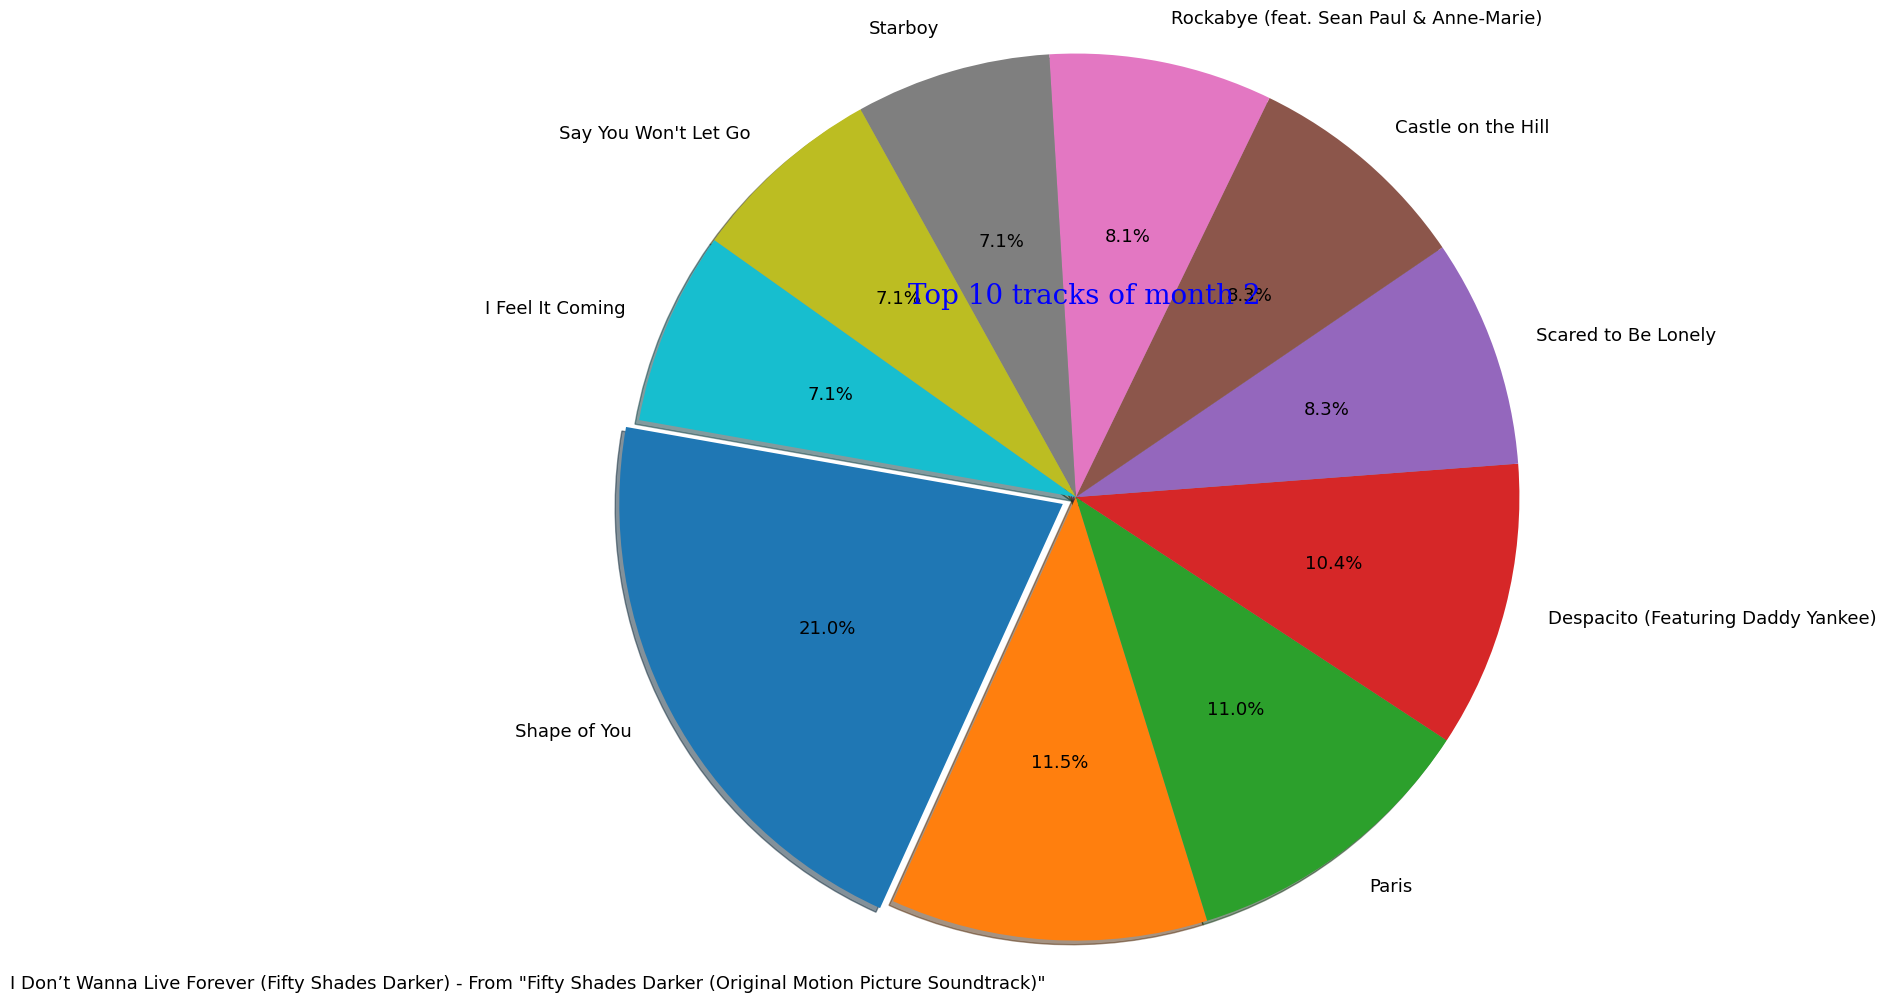

In [196]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 2", fontdict = font1, loc = 'right')


 plt.pie(month2_top10['No of Streams'], labels = month2_top10['top 10 tracks'], textprops={'fontsize': 13}, startangle=170,
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 3

In [197]:
month3_track_analysis=data[data['Month']==3].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month3_track_analysis.fillna(0, inplace=True)

month3_track_analysis.head()

Month,3
Track Name,
#HEY!,22272
#SorryNotSorry - 3onderboy remix,7242
#hashdark,3799
'Till I Collapse,7689474
(No One Knows Me) Like the Piano,35290


In [198]:
month3_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month3_top10['No of Streams']=sorted(month3_track_analysis[3],reverse=True)[:10]

for i in range(len(month3_top10['No of Streams'])):
    
    month3_top10['top 10 tracks'][i]=month3_track_analysis.index[month3_track_analysis[3] == month3_top10['No of Streams'][i]].values[0]

month3_top10

,No of Streams,top 10 tracks
0,469111248,Shape of You
1,256554494,It Ain't Me (with Selena Gomez)
2,245218470,Something Just Like This
3,222018353,Galway Girl
4,204776812,Despacito (Featuring Daddy Yankee)
5,195707966,I Don’t Wanna Live Forever (Fifty Shades Darke...
6,194000899,Castle on the Hill
7,190931858,Paris
8,181394387,That's What I Like
9,177795344,Stay (with Alessia Cara)


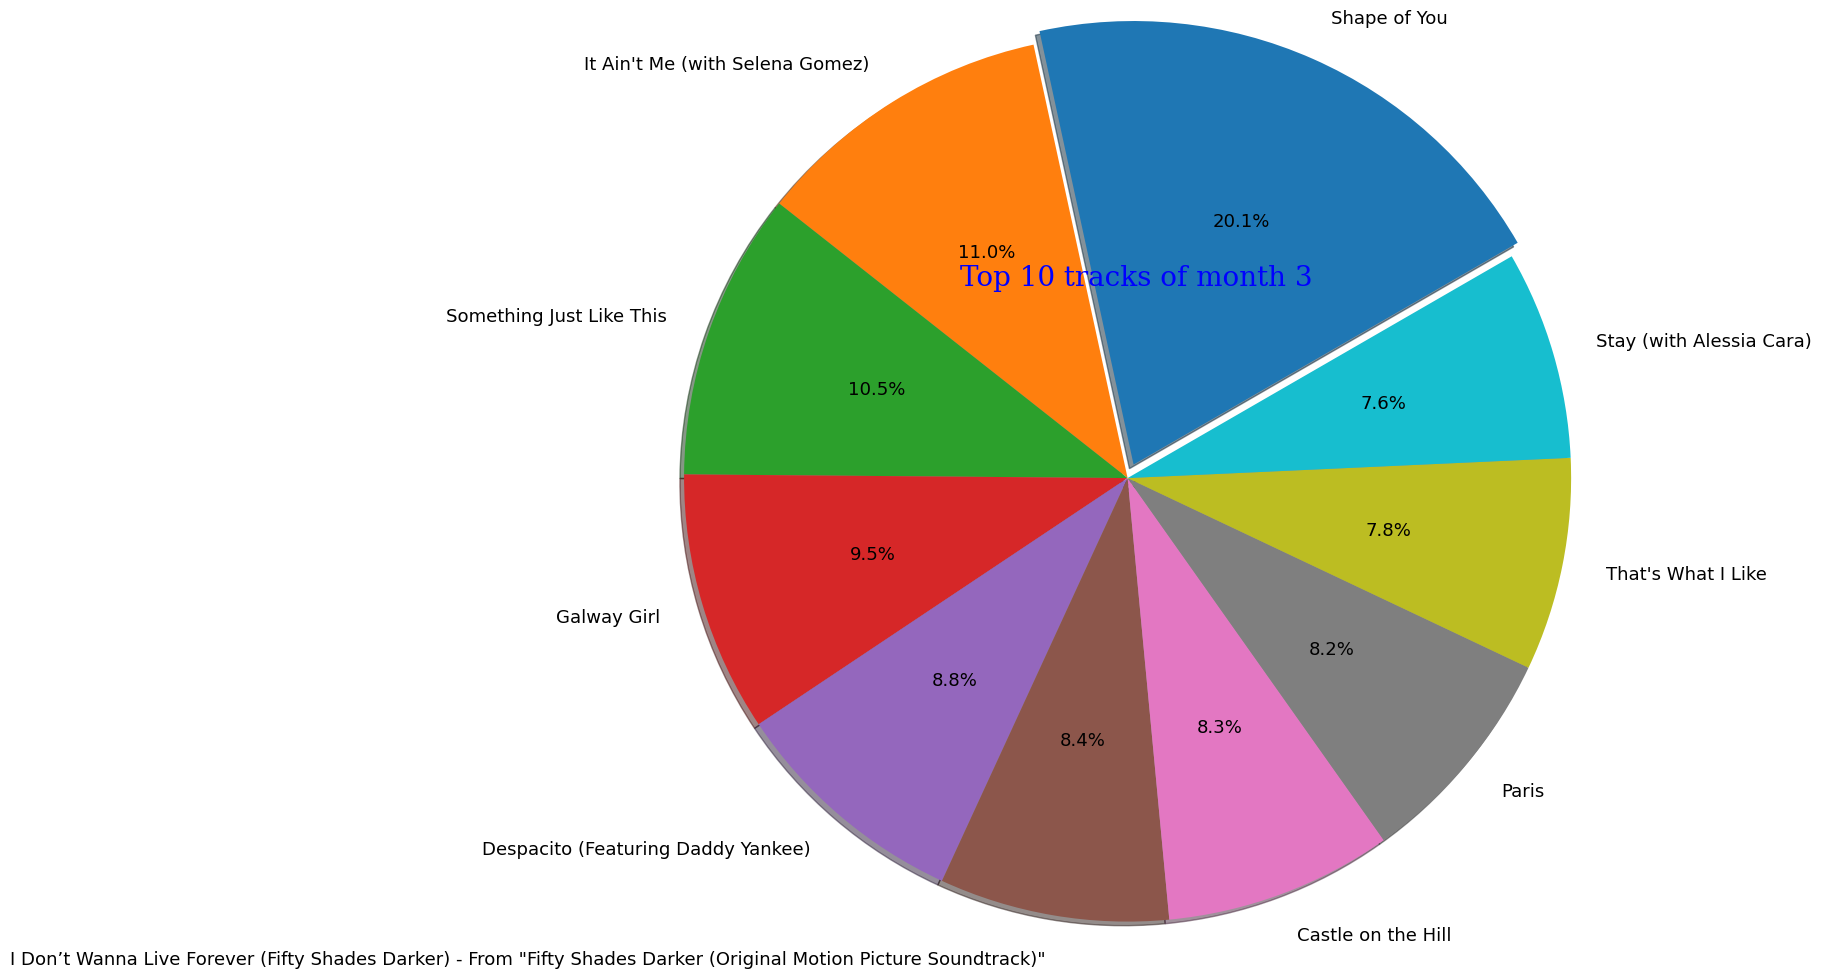

In [199]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 3", fontdict = font1, loc = 'right')

 plt.pie(month3_top10['No of Streams'], labels = month3_top10['top 10 tracks'], textprops={'fontsize': 13}, startangle=30,
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0), shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 4

In [200]:
month4_track_analysis=data[data['Month']==4].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month4_track_analysis.fillna(0, inplace=True)

month4_track_analysis.head()

Month,4
Track Name,
#HEY!,4451
'Till I Collapse,1820714
+1,123224
"0 Sentimientos (Remix) [feat. Noriel, Darkiel, Lyan, Messiah & Baby Rasta]",981108
1 Night,180123


In [201]:
month4_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month4_top10['No of Streams']=sorted(month4_track_analysis[4],reverse=True)[:10]

for i in range(len(month4_top10['No of Streams'])):
    
    month4_top10['top 10 tracks'][i]=month4_track_analysis.index[month4_track_analysis[4] == month4_top10['No of Streams'][i]].values[0]

month4_top10

,No of Streams,top 10 tracks
0,340035736,Shape of You
1,275145533,HUMBLE.
2,230799878,Something Just Like This
3,216530554,It Ain't Me (with Selena Gomez)
4,206730740,Passionfruit
5,203646980,Mask Off
6,190429482,That's What I Like
7,189327864,Stay (with Alessia Cara)
8,177051386,Despacito (Featuring Daddy Yankee)
9,175319498,Symphony (feat. Zara Larsson)


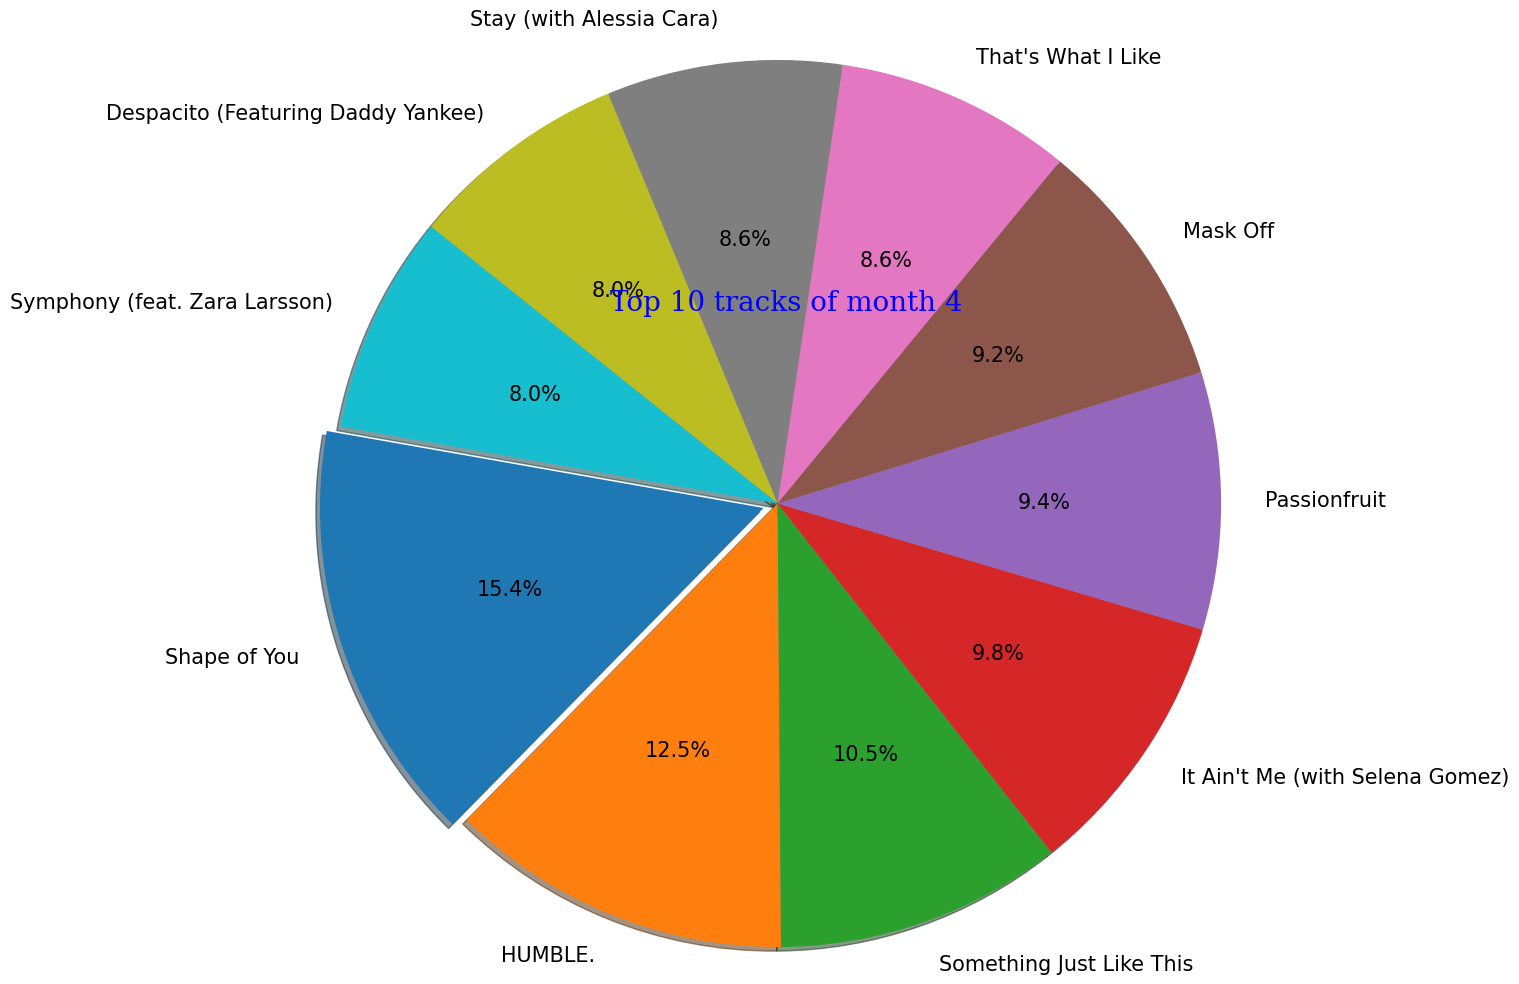

In [202]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 4", fontdict = font1, loc = 'right')

 plt.pie(month4_top10['No of Streams'], labels = month4_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),textprops={'fontsize': 15}, startangle=170, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 5

In [203]:
month5_track_analysis=data[data['Month']==5].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month5_track_analysis.fillna(0, inplace=True)

month5_track_analysis.head()

Month,5
Track Name,
'Till I Collapse,1542157
(Your Love Keeps Lifting Me) Higher & Higher,3164
"0 Sentimientos (Remix) [feat. Noriel, Darkiel, Lyan, Messiah & Baby Rasta]",835724
1 Night,166178
1-2-3,45383


In [204]:
month5_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month5_top10['No of Streams']=sorted(month5_track_analysis[5],reverse=True)[:10]

for i in range(len(month5_top10['No of Streams'])):
    
    month5_top10['top 10 tracks'][i]=month5_track_analysis.index[month5_track_analysis[5] == month5_top10['No of Streams'][i]].values[0]

month5_top10

,No of Streams,top 10 tracks
0,389445999,Despacito - Remix
1,323519523,I'm the One
2,269169687,Shape of You
3,242281099,HUMBLE.
4,200111087,Despacito (Featuring Daddy Yankee)
5,180559007,Mask Off
6,179955790,Something Just Like This
7,177947621,It Ain't Me (with Selena Gomez)
8,176864082,Stay (with Alessia Cara)
9,170945780,Swalla (feat. Nicki Minaj & Ty Dolla $ign)


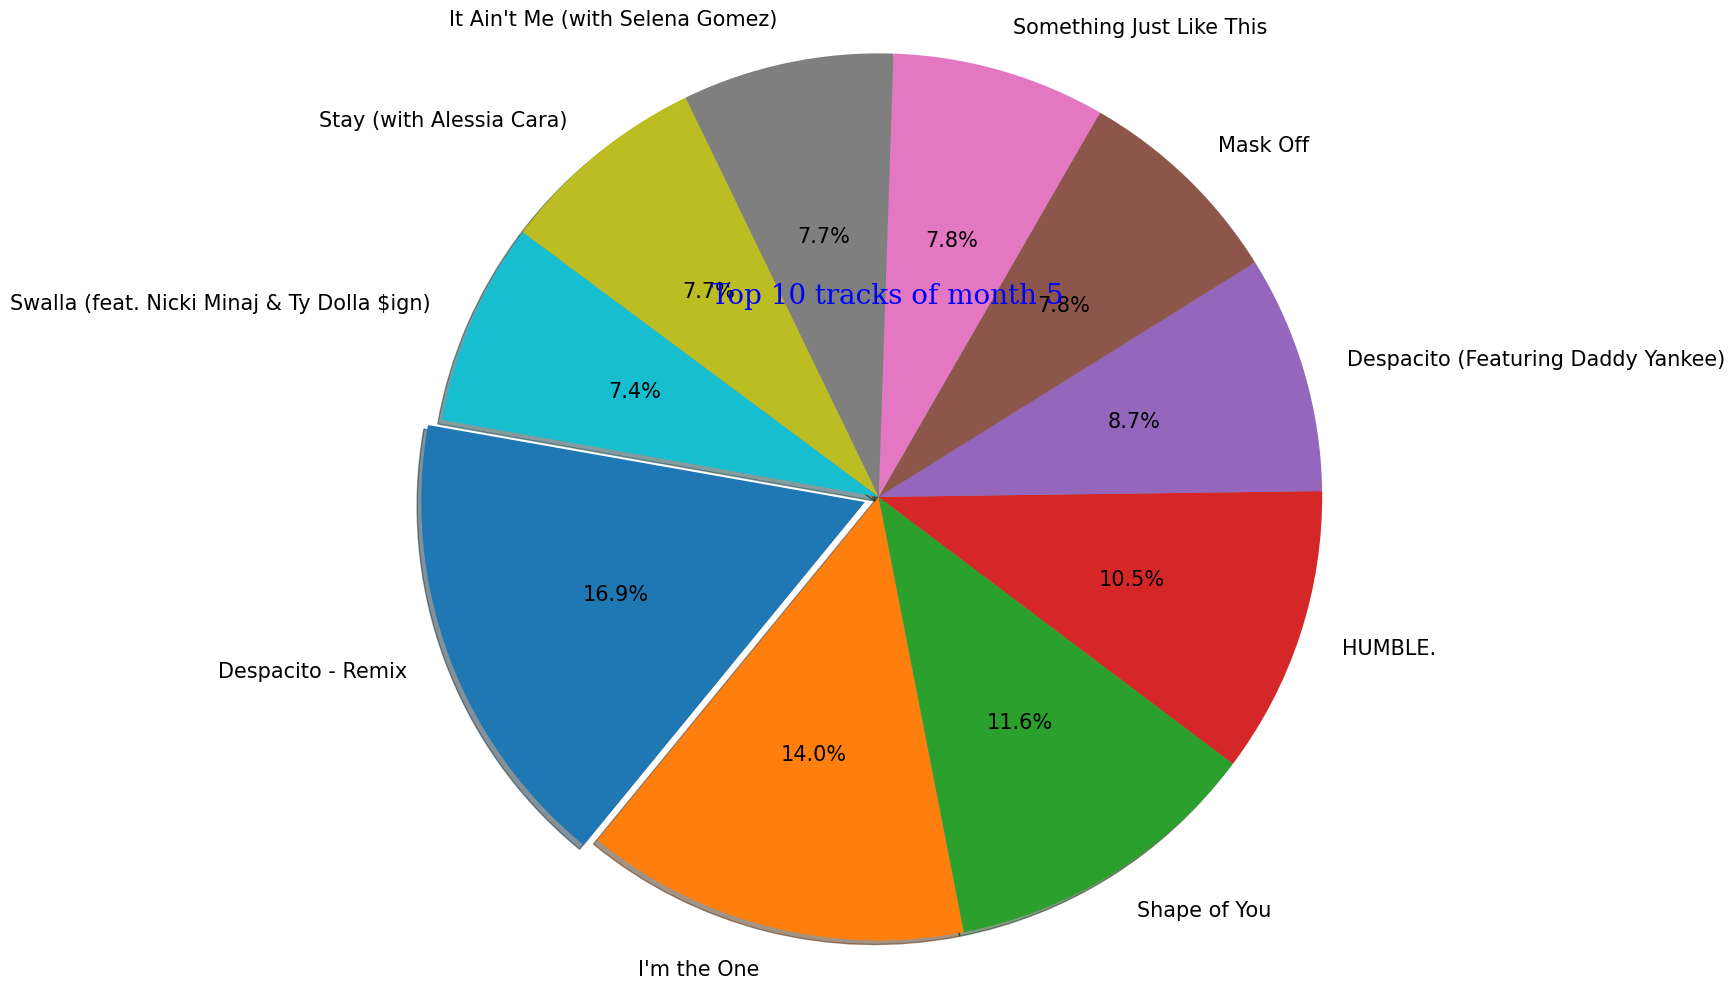

In [205]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 5", fontdict = font1, loc = 'right')

 plt.pie(month5_top10['No of Streams'], labels = month5_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),textprops={'fontsize': 15}, startangle=170, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 6

In [206]:
month6_track_analysis=data[data['Month']==6].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month6_track_analysis.fillna(0, inplace=True)

month6_track_analysis.head()

Month,6
Track Name,
#CTZK,47884
#Elämänpeli (feat. Touko),16205
#Sohavégetnemérős,1032
&Run,7759
'Till I Collapse,2530729


In [207]:
month6_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month6_top10['No of Streams']=sorted(month6_track_analysis[6],reverse=True)[:10]

for i in range(len(month6_top10['No of Streams'])):
    
    month6_top10['top 10 tracks'][i]=month6_track_analysis.index[month6_track_analysis[6] == month6_top10['No of Streams'][i]].values[0]

month6_top10

,No of Streams,top 10 tracks
0,384304420,Despacito - Remix
1,266738600,I'm the One
2,219295280,Shape of You
3,181656672,Unforgettable
4,181210382,Attention
5,180304289,HUMBLE.
6,178179336,2U (feat. Justin Bieber)
7,160972086,Swalla (feat. Nicki Minaj & Ty Dolla $ign)
8,160245685,Strip That Down
9,160193782,There's Nothing Holdin' Me Back


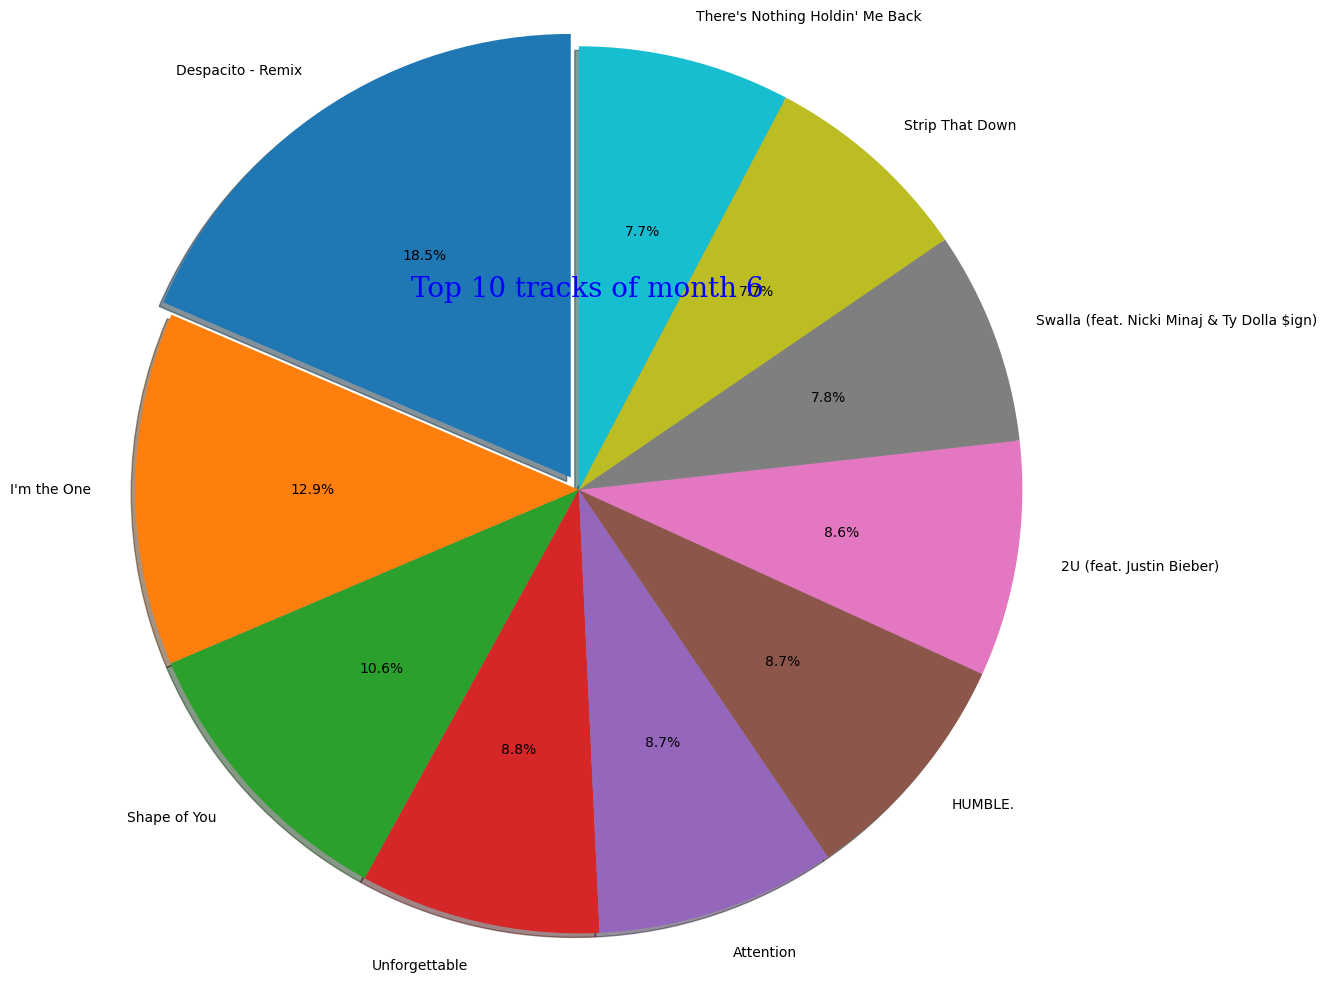

In [208]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 6", fontdict = font1, loc = 'right')

 plt.pie(month6_top10['No of Streams'], labels = month6_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 7

In [209]:
month7_track_analysis=data[data['Month']==7].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month7_track_analysis.fillna(0, inplace=True)

month7_track_analysis.head()

Month,7
Track Name,
#CTZK,91576
#Elämänpeli (feat. Touko),315677
#LDL,51922
'Till I Collapse,8880008
"0 Sentimientos (Remix) [feat. Noriel, Darkiel, Lyan, Messiah & Baby Rasta]",600278


In [210]:
month7_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month7_top10['No of Streams']=sorted(month7_track_analysis[7],reverse=True)[:10]

for i in range(len(month7_top10['No of Streams'])):
    
    month7_top10['top 10 tracks'][i]=month7_track_analysis.index[month7_track_analysis[7] == month7_top10['No of Streams'][i]].values[0]

month7_top10

,No of Streams,top 10 tracks
0,324530644,Despacito - Remix
1,256949490,Wild Thoughts
2,226012044,I'm the One
3,214483329,Unforgettable
4,201584493,Mi Gente
5,201501855,2U (feat. Justin Bieber)
6,199073911,Shape of You
7,194551148,Feels
8,185368291,Attention
9,172640918,Strip That Down


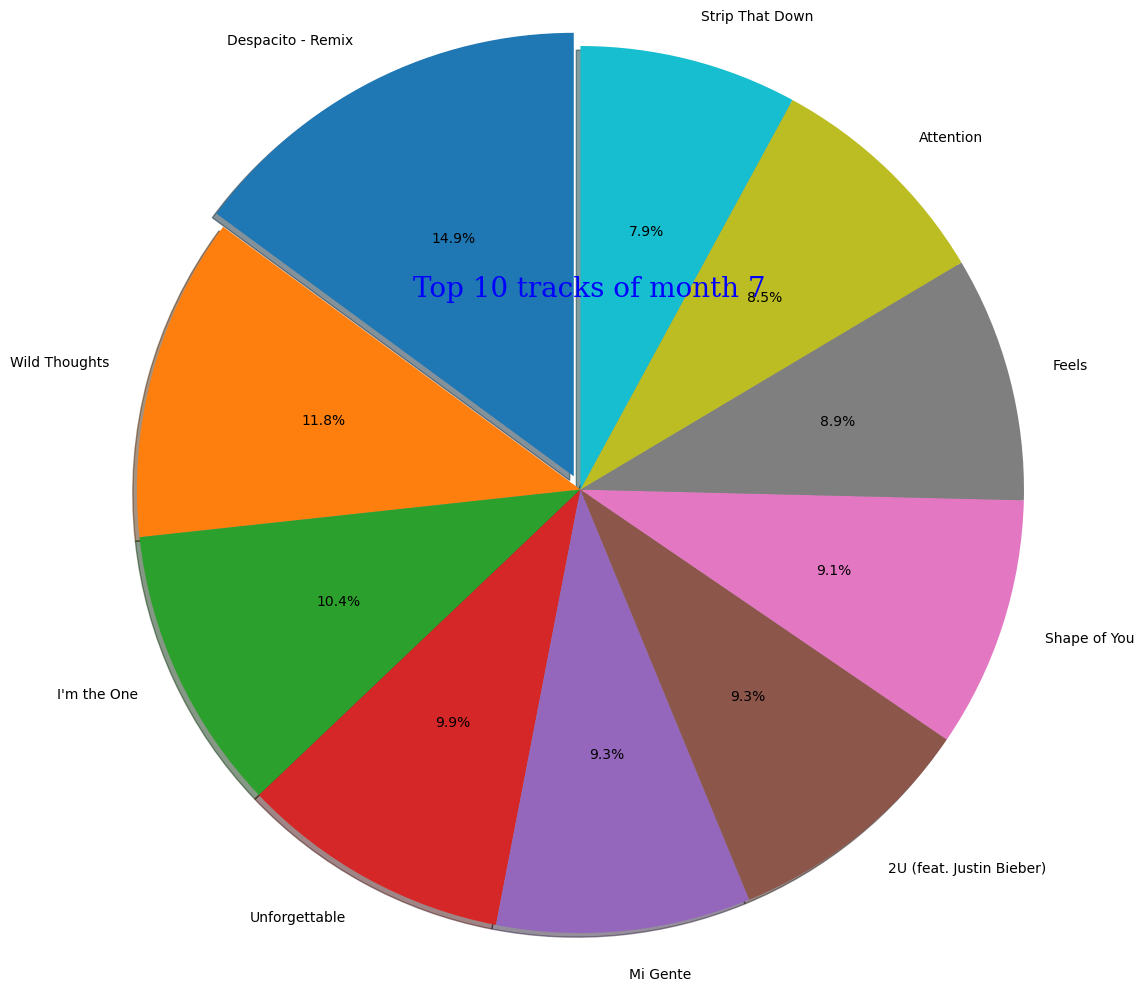

In [211]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 7", fontdict = font1, loc = 'right')

 plt.pie(month7_top10['No of Streams'], labels = month7_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 8

In [212]:
month8_track_analysis=data[data['Month']==8].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month8_track_analysis.fillna(0, inplace=True)

month8_track_analysis.head()

Month,8
Track Name,
#CTZK,135345
#Elämänpeli (feat. Touko),73889
#Lávkóma,19921
'Till I Collapse,15931749
(Not) The One,1751674


In [213]:
month8_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month8_top10['No of Streams']=sorted(month8_track_analysis[8],reverse=True)[:10]

for i in range(len(month8_top10['No of Streams'])):
    
    month8_top10['top 10 tracks'][i]=month8_track_analysis.index[month8_track_analysis[8] == month8_top10['No of Streams'][i]].values[0]

month8_top10

,No of Streams,top 10 tracks
0,281206000,Mi Gente
1,224116198,Unforgettable
2,218671024,Despacito - Remix
3,206564097,Wild Thoughts
4,198136467,Feels
5,173896451,2U (feat. Justin Bieber)
6,170458204,New Rules
7,168310616,Attention
8,166852553,Shape of You
9,160631157,I'm the One


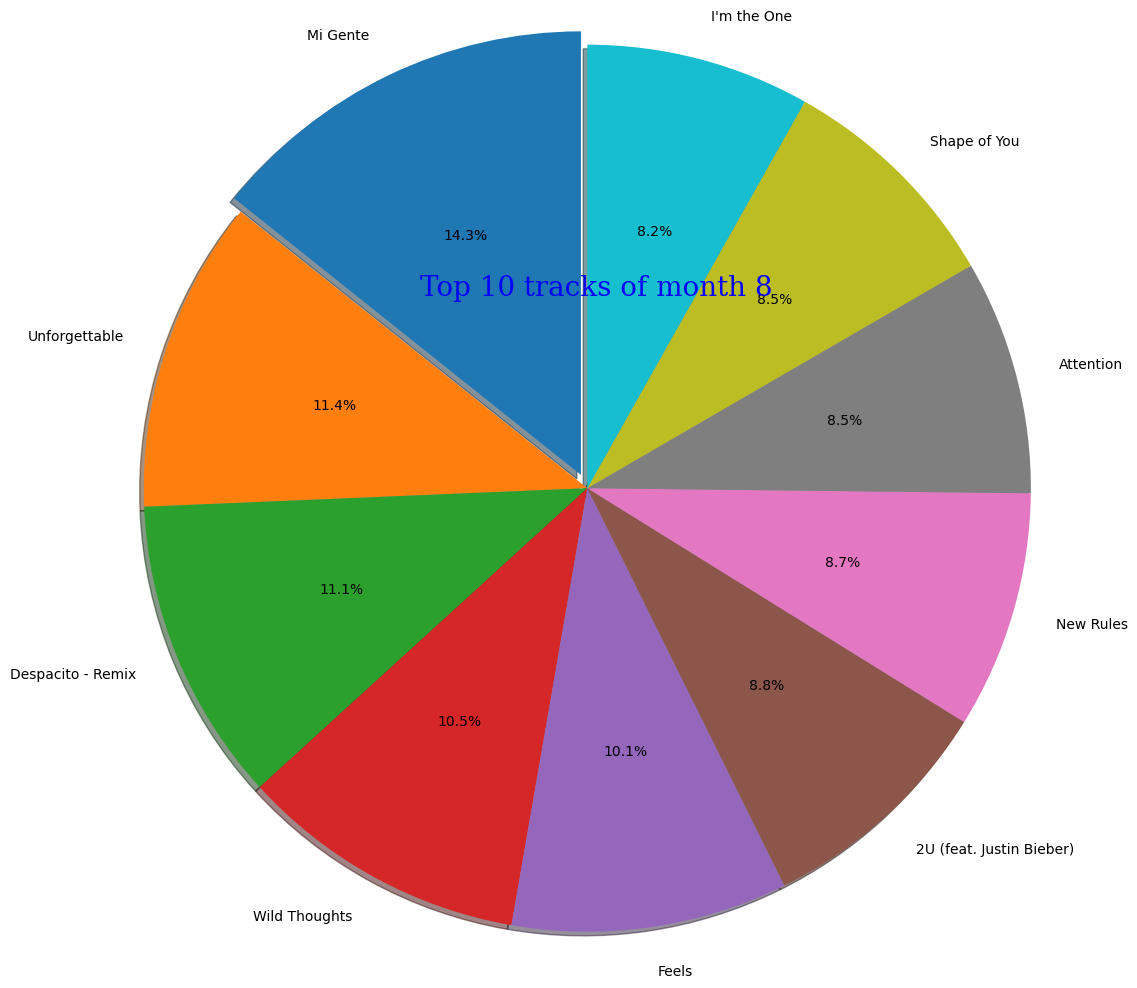

In [214]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 8", fontdict = font1, loc = 'right')

 plt.pie(month8_top10['No of Streams'], labels = month8_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 9

In [215]:
month9_track_analysis=data[data['Month']==9].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month9_track_analysis.fillna(0, inplace=True)

month9_track_analysis.head()

Month,9
Track Name,
#Biziz - feat. Lil Bege,271192
#CTZK,152572
#Lávkóma,33943
#愛,3218
'Till I Collapse,12097744


In [216]:
month9_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month9_top10['No of Streams']=sorted(month9_track_analysis[9],reverse=True)[:10]

for i in range(len(month9_top10['No of Streams'])):
    
    month9_top10['top 10 tracks'][i]=month9_track_analysis.index[month9_track_analysis[9] == month9_top10['No of Streams'][i]].values[0]

month9_top10

,No of Streams,top 10 tracks
0,237994936,Mi Gente
1,228981593,Look What You Made Me Do
2,216157306,New Rules
3,201156991,Unforgettable
4,183878821,1-800-273-8255
5,182502201,rockstar
6,175566660,Friends (with BloodPop®)
7,173764277,Havana
8,162890402,Silence
9,162877722,Too Good At Goodbyes - Edit


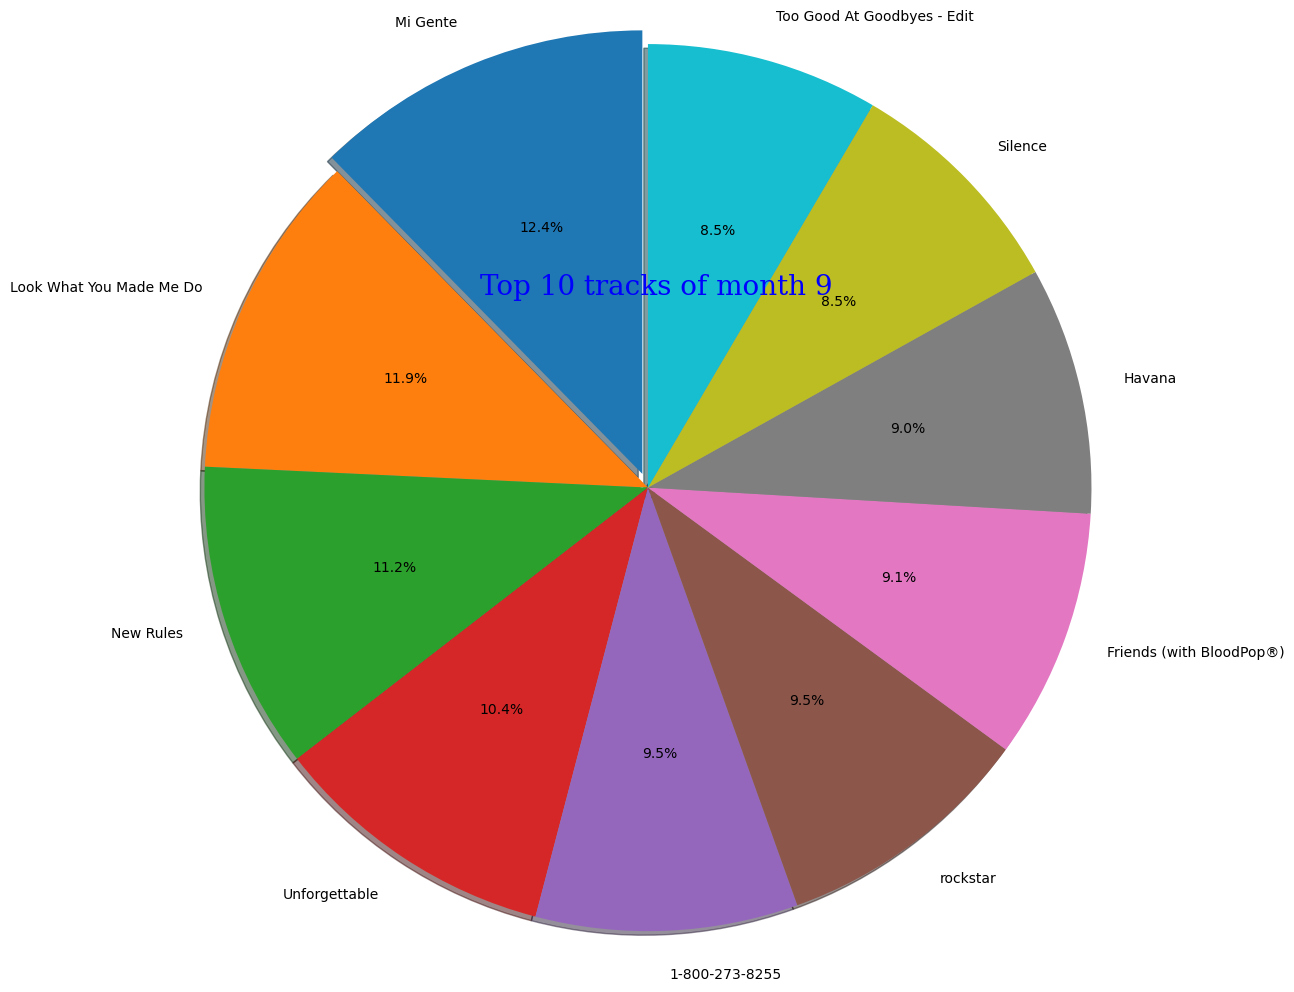

In [217]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 9", fontdict = font1, loc = 'right')

 plt.pie(month9_top10['No of Streams'], labels = month9_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 10

In [218]:
month10_track_analysis=data[data['Month']==10].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month10_track_analysis.fillna(0, inplace=True)

month10_track_analysis.head()

Month,10
Track Name,
"""Read All About It, Pt. III""",22826
#Biziz - feat. Lil Bege,132399
#CTZK,178864
#Lávkóma,8686
'Till I Collapse,25775039


In [219]:
month10_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month10_top10['No of Streams']=sorted(month10_track_analysis[10],reverse=True)[:10]

for i in range(len(month10_top10['No of Streams'])):
    
    month10_top10['top 10 tracks'][i]=month10_track_analysis.index[month10_track_analysis[10] == month10_top10['No of Streams'][i]].values[0]

month10_top10

,No of Streams,top 10 tracks
0,391652771,rockstar
1,222690964,New Rules
2,219162867,Havana
3,192981869,Dusk Till Dawn - Radio Edit
4,191585631,Too Good At Goodbyes - Edit
5,178190403,1-800-273-8255
6,174954249,What Lovers Do (feat. SZA)
7,166719016,Silence
8,164456329,Perfect
9,150627119,Mi Gente


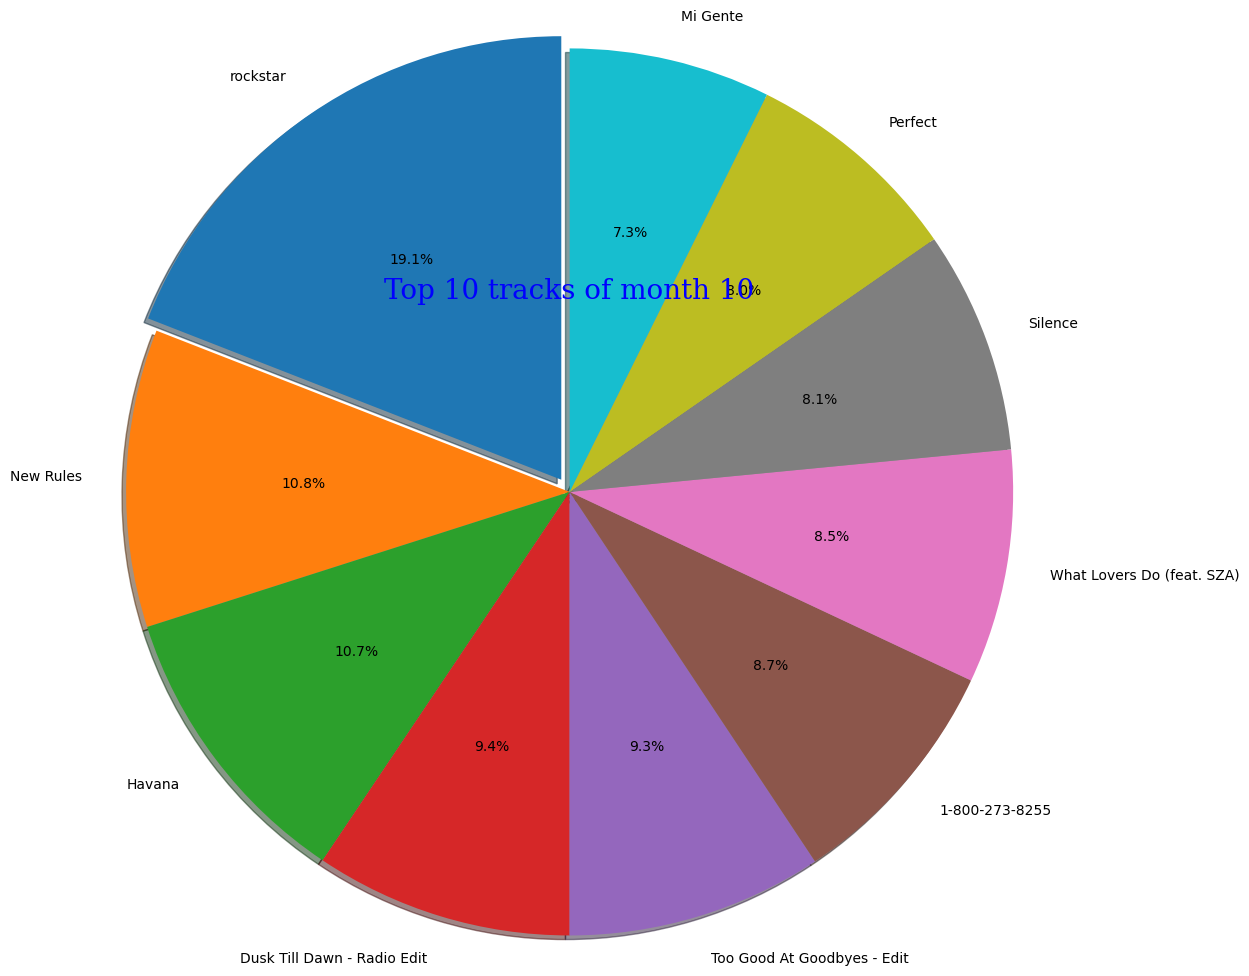

In [220]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 10", fontdict = font1, loc = 'right')

 plt.pie(month10_top10['No of Streams'], labels = month10_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 11

In [221]:
month11_track_analysis=data[data['Month']==11].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month11_track_analysis.fillna(0, inplace=True)

month11_track_analysis.head()

Month,11
Track Name,
#CTZK,63322
#JM,3723525
#Natural,1774917
#PTD,351224
'Till I Collapse,19843859


In [222]:
month11_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month11_top10['No of Streams']=sorted(month11_track_analysis[11],reverse=True)[:10]

for i in range(len(month11_top10['No of Streams'])):
    
    month11_top10['top 10 tracks'][i]=month11_track_analysis.index[month11_track_analysis[11] == month11_top10['No of Streams'][i]].values[0]

month11_top10

,No of Streams,top 10 tracks
0,325969141,rockstar
1,266548375,Havana
2,212010163,New Rules
3,194996010,Wolves
4,194026562,Too Good At Goodbyes
5,192207068,Perfect
6,183660359,What Lovers Do (feat. SZA)
7,181176152,Gucci Gang
8,165874161,Dusk Till Dawn - Radio Edit
9,164615758,Let You Down


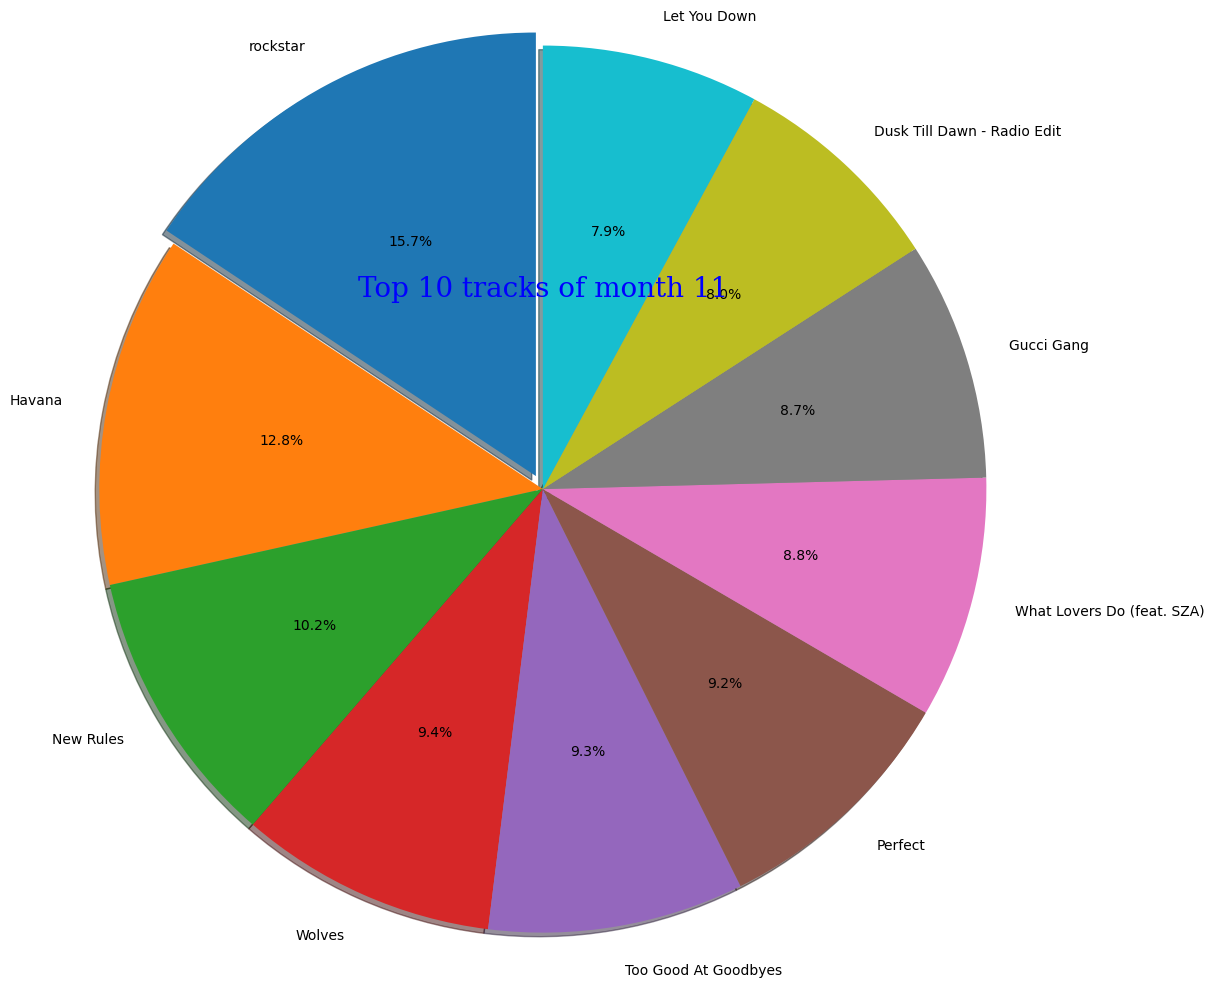

In [223]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 11", fontdict = font1, loc = 'right')

 plt.pie(month11_top10['No of Streams'], labels = month11_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

#### month 12

In [224]:
month12_track_analysis=data[data['Month']==12].pivot_table('Streams', ['Track Name'], 'Month', aggfunc='sum').copy()

month12_track_analysis.fillna(0, inplace=True)

month12_track_analysis.head()

Month,12
Track Name,
#JM,2567477
#Natural,4337741
#PTD,325185
#SELFIE,18668
#Totopirate,56854


In [225]:
month12_top10=pd.DataFrame(columns=['No of Streams','top 10 tracks'])

month12_top10['No of Streams']=sorted(month12_track_analysis[12],reverse=True)[:10]

for i in range(len(month12_top10['No of Streams'])):
    
    month12_top10['top 10 tracks'][i]=month12_track_analysis.index[month12_track_analysis[12] == month12_top10['No of Streams'][i]].values[0]

month12_top10

,No of Streams,top 10 tracks
0,286287465,rockstar
1,235288245,Havana
2,192760797,New Rules
3,185293356,Wolves
4,182200692,All I Want for Christmas Is You
5,174411183,Perfect Duet (Ed Sheeran & Beyoncé)
6,170132871,Perfect
7,162152617,Gucci Gang
8,161798224,Let You Down
9,154929392,Too Good At Goodbyes


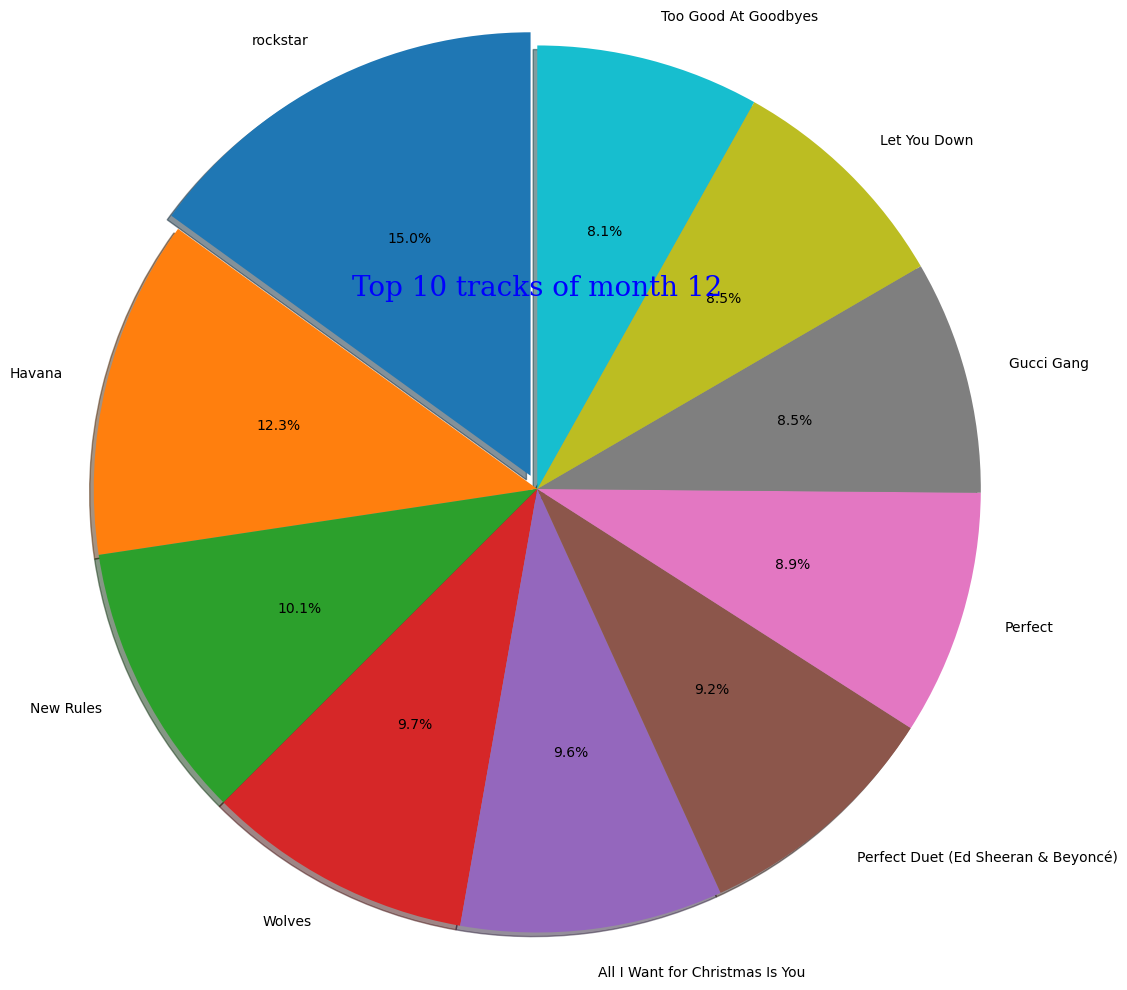

In [226]:
 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # Title
 plt.title("Top 10 tracks of month 12", fontdict = font1, loc = 'right')

 plt.pie(month12_top10['No of Streams'], labels = month12_top10['top 10 tracks'], 
         explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),startangle=90, shadow = True, radius = 3, autopct = '%1.1f%%')
 
    
 # show the plot
 plt.show() 

code-name of track returns its monthly and total streaming distribution

# Region vs track

In [227]:
data.head()

,Position,Track Name,Artist,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,Reggaetón Lento (Bailemos),897,19272,ec,2017,1,1,1,6
1,2,Chantaje,5194,19270,ec,2017,1,1,1,6
2,3,Otra Vez (feat. J Balvin),6331,15761,ec,2017,1,1,1,6
3,4,Vente Pa' Ca,4854,14954,ec,2017,1,1,1,6
4,5,Safari,2523,14269,ec,2017,1,1,1,6


In [228]:
Analysis_track_Region=data.pivot_table('Streams', ['Track Name'], 'Region', aggfunc='sum').copy()

Analysis_track_Region.fillna(0, inplace=True)

Analysis_track_Region.head()

Region,ar,at,au,be,bo,br,ca,ch,cl,co,...,pt,py,se,sg,sk,sv,tr,tw,us,uy
Track Name,,,,,,,,,,,,,,,,,,,,,
"""All That Is or Ever Was or Ever Will Be""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0
"""Read All About It, Pt. III""",0.0,0.0,0.0,15971.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Askip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Biziz - feat. Lil Bege,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,403591.0,0.0,0.0,0.0


In [229]:
track_Region=pd.DataFrame(columns=['Region','Most Popular track of this region','No of Streams']).copy()

for i in track_Region:
    
    track_Region[i]=np.zeros(54, dtype=int)
    
track_Region.head()

,Region,Most Popular track of this region,No of Streams
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [230]:
index=0

for i in Analysis_track_Region:
    
    track_Region['Region'][index]=i
    
    track_Region['No of Streams'][index]=sorted(Analysis_track_Region.iloc[:,index],reverse=True)[0]
    
    track_Region['Most Popular track of this region'][index]= Analysis_track_Region.index[Analysis_track_Region.iloc[:,index]==track_Region['No of Streams'][index]].values[0]
    
    index=index+1

track_Region.head()

,Region,Most Popular track of this region,No of Streams
0,ar,Despacito (Featuring Daddy Yankee),52806879
1,at,Shape of You,5657482
2,au,Shape of You,51174073
3,be,Shape of You,11100581
4,bo,Me Rehúso,2595190


creating a list of Tracks with most streams corresponding to any region and creating a column for their streams in respective regions

In [231]:
tracks=track_Region['Most Popular track of this region'].value_counts().index.tolist()

for i in tracks:
    
    track_Region[i]=Analysis_track_Region.loc[i].tolist()

In [232]:
track_Region.head()

,Region,Most Popular track of this region,No of Streams,Shape of You,Me Rehúso,Despacito (Featuring Daddy Yankee),Despacito - Remix,HUMBLE.
0,ar,Despacito (Featuring Daddy Yankee),52806879,41015620.0,48629774.0,52806879.0,20936908.0,1192877.0
1,at,Shape of You,5657482,5657482.0,614389.0,2747120.0,2695448.0,1493506.0
2,au,Shape of You,51174073,51174073.0,168753.0,5765439.0,31594441.0,32183365.0
3,be,Shape of You,11100581,11100581.0,610056.0,4285206.0,4790170.0,3597942.0
4,bo,Me Rehúso,2595190,1837936.0,2595190.0,1999986.0,727374.0,115876.0


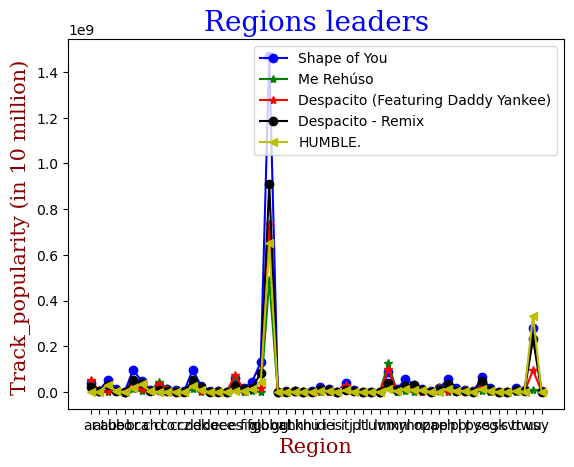

In [233]:
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Regions leaders", fontdict = font1)

 # Y label
 plt.ylabel("Track_popularity (in 10 million) ", fontdict = font2)

 # X label
 plt.xlabel("Region", fontdict = font2)


    
 plt.plot(track_Region['Region'], track_Region['Shape of You'], 'bo-',label='Shape of You')
    
 plt.plot(track_Region['Region'], track_Region['Me Rehúso'], 'g*-', label='Me Rehúso')
    
 plt.plot(track_Region['Region'], track_Region['Despacito (Featuring Daddy Yankee)'], 'r*-', label='Despacito (Featuring Daddy Yankee)')

 plt.plot(track_Region['Region'], track_Region['Despacito - Remix'], color='black', marker='o', label='Despacito - Remix')
    
 plt.plot(track_Region['Region'], track_Region['HUMBLE.'], 'y<-', label='HUMBLE.')
    

 plt.legend()

 
 # show the plot
 plt.show()

In [234]:
track_Region

,Region,Most Popular track of this region,No of Streams,Shape of You,Me Rehúso,Despacito (Featuring Daddy Yankee),Despacito - Remix,HUMBLE.
0,ar,Despacito (Featuring Daddy Yankee),52806879,4.101562e+07,48629774.0,52806879.0,20936908.0,1192877.0
1,at,Shape of You,5657482,5.657482e+06,614389.0,2747120.0,2695448.0,1493506.0
2,au,Shape of You,51174073,5.117407e+07,168753.0,5765439.0,31594441.0,32183365.0
3,be,Shape of You,11100581,1.110058e+07,610056.0,4285206.0,4790170.0,3597942.0
4,bo,Me Rehúso,2595190,1.837936e+06,2595190.0,1999986.0,727374.0,115876.0
5,br,Shape of You,95996545,9.599654e+07,11207345.0,41689975.0,52576561.0,15830788.0
6,ca,Shape of You,47342929,4.734293e+07,2610575.0,12583764.0,38560298.0,34245461.0
7,ch,Shape of You,9784521,9.784521e+06,2499301.0,6048366.0,4207035.0,2653273.0
8,cl,Me Rehúso,42467503,2.913574e+07,42467503.0,35645926.0,10586146.0,1120187.0
9,co,Me Rehúso,15385259,1.461721e+07,15385259.0,13623059.0,4323719.0,944291.0


### top 10 regions

Now lets see similar analysis for 10 of the strongest regions in terms of streaming capacity to get a broader picture

In [235]:
region_streams_count=data.pivot_table('Streams', 'Region', aggfunc='sum').copy()
region_streams_count.head()

,Streams
Region,
ar,2687570939
at,335879644
au,3283499394
be,544140792
bo,94319700


In [236]:
top10_streams=sorted(region_streams_count['Streams'],reverse=True)[0:11]
top10_streams

[75021041432,
 25764218998,
 7031797779,
 6677867793,
 6178260482,
 5930629218,
 3667338121,
 3393297216,
 3306216382,
 3283499394,
 3241421071]

In [237]:
top10_regions=[None]*11
for i in range(len(top10_streams)):
    top10_regions[i]=region_streams_count.index[region_streams_count['Streams']==top10_streams[i]].tolist()[0]
top10_regions

['global', 'us', 'gb', 'br', 'mx', 'de', 'es', 'nl', 'se', 'au', 'ph']

10 regions analysis

In [238]:
top10_Analysis_track_Region=data[data['Region'].isin(top10_regions)].pivot_table('Streams', ['Track Name'], 'Region', aggfunc='sum').copy()

top10_Analysis_track_Region.fillna(0, inplace=True)

top10_Analysis_track_Region.head()

Region,au,br,de,es,gb,global,mx,nl,ph,se,us
Track Name,,,,,,,,,,,
"""Read All About It, Pt. III""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17307.0,0.0
#JM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6265874.0,0.0,0.0,0.0
#Natural,0.0,0.0,0.0,1292450.0,0.0,0.0,3275333.0,0.0,0.0,0.0,0.0
'Till I Collapse,2898285.0,0.0,9352939.0,0.0,1057485.0,65130365.0,0.0,0.0,0.0,3336611.0,36493752.0
(Don't Fear) The Reaper,0.0,0.0,0.0,0.0,148779.0,613988.0,0.0,0.0,0.0,0.0,543066.0


In [239]:
top10_track_Region=pd.DataFrame(columns=['Region','Most Popular track of this region','No of Streams']).copy()

for i in top10_track_Region:
    
    top10_track_Region[i]=np.zeros(54, dtype=int)
    
top10_track_Region.head()

,Region,Most Popular track of this region,No of Streams
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [240]:
index=0

for i in top10_Analysis_track_Region:
    
    top10_track_Region['Region'][index]=i
    
    top10_track_Region['No of Streams'][index]=sorted(top10_Analysis_track_Region.iloc[:,index],reverse=True)[0]
    
    top10_track_Region['Most Popular track of this region'][index]= top10_Analysis_track_Region.index[top10_Analysis_track_Region.iloc[:,index]==top10_track_Region['No of Streams'][index]].values[0]
    
    index=index+1
    
top10_track_Region = top10_track_Region.iloc[:11,:].copy()

top10_track_Region

,Region,Most Popular track of this region,No of Streams
0,au,Shape of You,51174073
1,br,Shape of You,95996545
2,de,Shape of You,96505235
3,es,Despacito (Featuring Daddy Yankee),76135182
4,gb,Shape of You,130658891
5,global,Shape of You,1470919913
6,mx,Me Rehúso,127468959
7,nl,Shape of You,55512591
8,ph,Shape of You,57245668
9,se,Shape of You,63184448


creating a list of Tracks with most streams corresponding to any region and creating a column for their streams in respective regions

In [241]:
top10_tracks=top10_track_Region['Most Popular track of this region'].value_counts().index.tolist()

for i in top10_tracks:
    
    top10_track_Region[i]=top10_Analysis_track_Region.loc[i].tolist()

top10_track_Region

,Region,Most Popular track of this region,No of Streams,Shape of You,Despacito (Featuring Daddy Yankee),Me Rehúso,HUMBLE.
0,au,Shape of You,51174073,5.117407e+07,5765439.0,168753.0,32183365.0
1,br,Shape of You,95996545,9.599654e+07,41689975.0,11207345.0,15830788.0
2,de,Shape of You,96505235,9.650524e+07,42373477.0,13086209.0,24176154.0
3,es,Despacito (Featuring Daddy Yankee),76135182,6.005714e+07,76135182.0,65869794.0,4757742.0
4,gb,Shape of You,130658891,1.306589e+08,15636898.0,0.0,41860750.0
5,global,Shape of You,1470919913,1.470920e+09,735938109.0,489853907.0,650411808.0
6,mx,Me Rehúso,127468959,8.632645e+07,99063182.0,127468959.0,13234549.0
7,nl,Shape of You,55512591,5.551259e+07,21874732.0,4503285.0,10620264.0
8,ph,Shape of You,57245668,5.724567e+07,5571243.0,0.0,12490147.0
9,se,Shape of You,63184448,6.318445e+07,20179505.0,3423311.0,13783490.0


global looks like world s global location so removing it

In [242]:
top10_track_Region=top10_track_Region[top10_track_Region['Region'] != 'global'].copy()
top10_track_Region.set_index([pd.Index(range(10))],inplace=True)
top10_track_Region

,Region,Most Popular track of this region,No of Streams,Shape of You,Despacito (Featuring Daddy Yankee),Me Rehúso,HUMBLE.
0,au,Shape of You,51174073,51174073.0,5765439.0,168753.0,32183365.0
1,br,Shape of You,95996545,95996545.0,41689975.0,11207345.0,15830788.0
2,de,Shape of You,96505235,96505235.0,42373477.0,13086209.0,24176154.0
3,es,Despacito (Featuring Daddy Yankee),76135182,60057135.0,76135182.0,65869794.0,4757742.0
4,gb,Shape of You,130658891,130658891.0,15636898.0,0.0,41860750.0
5,mx,Me Rehúso,127468959,86326454.0,99063182.0,127468959.0,13234549.0
6,nl,Shape of You,55512591,55512591.0,21874732.0,4503285.0,10620264.0
7,ph,Shape of You,57245668,57245668.0,5571243.0,0.0,12490147.0
8,se,Shape of You,63184448,63184448.0,20179505.0,3423311.0,13783490.0
9,us,HUMBLE.,334342280,278916058.0,94972759.0,9125236.0,334342280.0


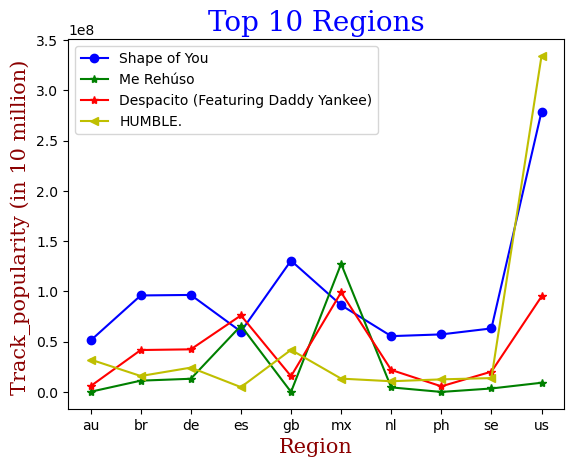

In [243]:
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Top 10 Regions", fontdict = font1)

 # Y label
 plt.ylabel("Track_popularity (in 10 million) ", fontdict = font2)

 # X label
 plt.xlabel("Region", fontdict = font2)


    
 plt.plot(top10_track_Region['Region'], top10_track_Region['Shape of You'], 'bo-',label='Shape of You')
    
 plt.plot(top10_track_Region['Region'], top10_track_Region['Me Rehúso'], 'g*-', label='Me Rehúso')
    
 plt.plot(top10_track_Region['Region'], top10_track_Region['Despacito (Featuring Daddy Yankee)'], 'r*-', label='Despacito (Featuring Daddy Yankee)')

 plt.plot(top10_track_Region['Region'], top10_track_Region['HUMBLE.'], 'y<-', label='HUMBLE.')
    

 plt.legend()

 
 # show the plot
 plt.show()

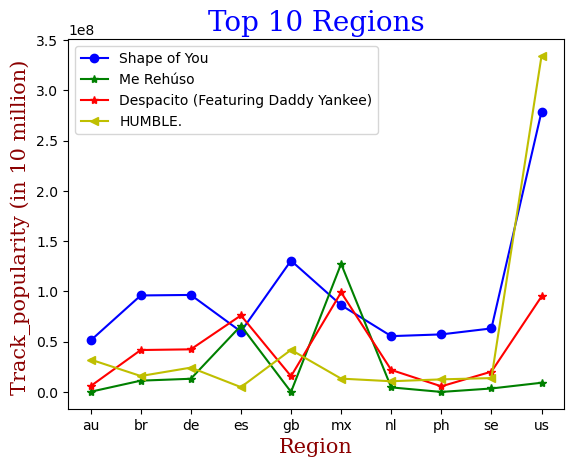

In [244]:
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Top 10 Regions", fontdict = font1)

 # Y label
 plt.ylabel("Track_popularity (in 10 million) ", fontdict = font2)

 # X label
 plt.xlabel("Region", fontdict = font2)


    
 plt.plot(top10_track_Region['Region'], top10_track_Region['Shape of You'], 'bo-',label='Shape of You')
    
 plt.plot(top10_track_Region['Region'], top10_track_Region['Me Rehúso'], 'g*-', label='Me Rehúso')
    
 plt.plot(top10_track_Region['Region'], top10_track_Region['Despacito (Featuring Daddy Yankee)'], 'r*-', label='Despacito (Featuring Daddy Yankee)')

 plt.plot(top10_track_Region['Region'], top10_track_Region['HUMBLE.'], 'y<-', label='HUMBLE.')
    

 plt.legend()

 
 # show the plot
 plt.show()

only descpacito remix is not present from outside of 10 regions
which means

descpacito remix is the only song which is the most streamed song of a region outside of these 

10 regions ( the other 44 regions).

all other songs which is the most popular streamed song any of the 44 regions is also the most streamed song of 

one of the 10 regions.


just by laymans s thinking, it looks very logical that if there to be only one song which were to be

most popular song of one of 44 regions and not be in 10 regions then it has to be remix of extremely popular

despacito.


remix is english translation of descpacito.

Despacito (Featuring Daddy Yankee) originially was originally sung in spanish and from graph 'es' is the only region where descpacito is 

most popular in these top 10 regions. so naturally 'es' is 'espain'.







similarly Me Rehúso is most streamed in 'mx' and itis one of the latin american countries.

gb, us and au have shape of you as most streamed song

gb - great britain
us-united states
au-austrailia 



we were confused between gb and br - which was uk but but since we assumed that the country which had most streams of shape of you after us would be uk

from the graph, gb had slightly more streams than br

# Top 10 tracks of all regions

In [245]:
# top n tracks 
n=10

In [246]:
Analysis_track_Region.head()

Region,ar,at,au,be,bo,br,ca,ch,cl,co,...,pt,py,se,sg,sk,sv,tr,tw,us,uy
Track Name,,,,,,,,,,,,,,,,,,,,,
"""All That Is or Ever Was or Ever Will Be""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0
"""Read All About It, Pt. III""",0.0,0.0,0.0,15971.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Askip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Biziz - feat. Lil Bege,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,403591.0,0.0,0.0,0.0


In [247]:
for i in Analysis_track_Region:
  region_streams=pd.DataFrame(columns=['Regions','Total Streaming']).copy()
region_streams['Regions']=[None]*54
region_streams['Total Streaming']=np.zeros(54, dtype=int).tolist()
region_streams.head()

,Regions,Total Streaming
0,None,0
1,None,0
2,None,0
3,None,0
4,None,0


In [248]:
regions=Analysis_track_Region.columns.tolist()

In [249]:
for i in range(len(regions)):
 region_streams['Regions'][i]=regions[i]
 region_streams['Total Streaming'][i]=sum(Analysis_track_Region[region_streams['Regions'][i]])

In [250]:
 region_streams.head()

,Regions,Total Streaming
0,ar,2687570939
1,at,335879644
2,au,3283499394
3,be,544140792
4,bo,94319700


In [251]:
region_streams=region_streams.sort_values(by='Total Streaming', ascending=False, ignore_index = True).copy()
region_streams.head()

,Regions,Total Streaming
0,global,75021041432
1,us,25764218998
2,gb,7031797779
3,br,6677867793
4,mx,6178260482


In [252]:
topN_track_specificRegion=pd.DataFrame().copy()
for i in region_streams['Regions']:
    topN_track_specificRegion[('top 10 most popular tracks of '+i)] = [None]*n
    topN_track_specificRegion[('no of streams in '+i)] = np.zeros(n, dtype=int).tolist()

In [253]:
topN_track_specificRegion.head()

,top 10 most popular tracks of global,no of streams in global,top 10 most popular tracks of us,no of streams in us,top 10 most popular tracks of gb,no of streams in gb,top 10 most popular tracks of br,no of streams in br,top 10 most popular tracks of mx,no of streams in mx,...,top 10 most popular tracks of sk,no of streams in sk,top 10 most popular tracks of lv,no of streams in lv,top 10 most popular tracks of lt,no of streams in lt,top 10 most popular tracks of ee,no of streams in ee,top 10 most popular tracks of lu,no of streams in lu
0,None,0,None,0,None,0,None,0,None,0,...,None,0,None,0,None,0,None,0,None,0
1,None,0,None,0,None,0,None,0,None,0,...,None,0,None,0,None,0,None,0,None,0
2,None,0,None,0,None,0,None,0,None,0,...,None,0,None,0,None,0,None,0,None,0
3,None,0,None,0,None,0,None,0,None,0,...,None,0,None,0,None,0,None,0,None,0
4,None,0,None,0,None,0,None,0,None,0,...,None,0,None,0,None,0,None,0,None,0


In [254]:
Analysis_track_Region.head()

Region,ar,at,au,be,bo,br,ca,ch,cl,co,...,pt,py,se,sg,sk,sv,tr,tw,us,uy
Track Name,,,,,,,,,,,,,,,,,,,,,
"""All That Is or Ever Was or Ever Will Be""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0
"""Read All About It, Pt. III""",0.0,0.0,0.0,15971.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Askip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Biziz - feat. Lil Bege,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,403591.0,0.0,0.0,0.0


In [255]:
for i in region_streams['Regions']:
    for j in range(n):
      topN_tracks_i=sorted(Analysis_track_Region.loc[:,i],reverse=True)[:n]
      topN_track_specificRegion[('no of streams in '+i)][j]=topN_tracks_i[j]
      track=Analysis_track_Region.index[Analysis_track_Region[i]==topN_tracks_i[j]].values[0]
      topN_track_specificRegion[('top 10 most popular tracks of '+i)][j]=track

In [256]:
topN_track_specificRegion

,top 10 most popular tracks of global,no of streams in global,top 10 most popular tracks of us,no of streams in us,top 10 most popular tracks of gb,no of streams in gb,top 10 most popular tracks of br,no of streams in br,top 10 most popular tracks of mx,no of streams in mx,...,top 10 most popular tracks of sk,no of streams in sk,top 10 most popular tracks of lv,no of streams in lv,top 10 most popular tracks of lt,no of streams in lt,top 10 most popular tracks of ee,no of streams in ee,top 10 most popular tracks of lu,no of streams in lu
0,Shape of You,1470919913,HUMBLE.,334342280,Shape of You,130658891,Shape of You,95996545,Me Rehúso,127468959,...,Shape of You,1250326,Shape of You,878169,Shape of You,900862,Shape of You,870791,Shape of You,544631
1,Despacito - Remix,908572590,XO TOUR Llif3,310161495,Castle on the Hill,84971558,Hear Me Now,80890131,Despacito (Featuring Daddy Yankee),99063182,...,Thunder,742455,HUMBLE.,595545,Thunder,433920,Something Just Like This,380450,Despacito (Featuring Daddy Yankee),257174
2,Despacito (Featuring Daddy Yankee),735938109,Congratulations,280284916,Despacito - Remix,84269655,Vidinha de Balada - Ao Vivo,72531814,Felices los 4,95915933,...,Something Just Like This,694095,Thunder,552940,Something Just Like This,422375,Despacito - Remix,346901,Despacito - Remix,247378
3,Something Just Like This,682354910,Shape of You,278916058,Unforgettable,77246831,Sua Cara (feat. Anitta & Pabllo Vittar),66760256,Shape of You,86326454,...,Believer,685364,rockstar,518123,Believer,403484,HUMBLE.,346582,Something Just Like This,224007
4,Unforgettable,665848199,Unforgettable,258836899,Galway Girl,69322634,Te Assumi Pro Brasil - Ao Vivo,64376190,Escápate Conmigo,76253977,...,More Than You Know,626918,Unforgettable,459738,HUMBLE.,394986,It Ain't Me (with Selena Gomez),341772,It Ain't Me (with Selena Gomez),198121
5,HUMBLE.,650411808,Mask Off,239307360,Symphony (feat. Zara Larsson),58499561,Raspão - Ao Vivo,63229258,Una Lady Como Tú,74311063,...,It Ain't Me (with Selena Gomez),607096,Something Just Like This,456500,It Ain't Me (with Selena Gomez),391386,I Don’t Wanna Live Forever (Fifty Shades Darke...,339345,Mask Off,181014
6,I'm the One,629377285,Despacito - Remix,232299068,I'm the One,58248740,Fazer Falta,61855558,Otra Vez (feat. J Balvin),66227010,...,rockstar,491568,Believer,453998,Despacito - Remix,391058,Believer,331035,I'm the One,173300
7,It Ain't Me (with Selena Gomez),597594929,rockstar,225517132,New Rules,58232846,K.O.,61525006,El Amante,65395852,...,Havana,490676,Congratulations,435149,Unforgettable,375897,Paris,318696,Unforgettable,168597
8,rockstar,594549415,iSpy (feat. Lil Yachty),224773101,You Don't Know Me - Radio Edit,54724872,Você Partiu Meu Coração,59717280,Ahora Dice,65039897,...,Mama,479796,XO TOUR Llif3,434020,I Don’t Wanna Live Forever (Fifty Shades Darke...,369101,Thunder,317676,Paris,158450
9,XO TOUR Llif3,579574845,Location,222266305,Wild Thoughts,53150283,Regime Fechado - Ao Vivo,56020768,Bonita,64300659,...,There's Nothing Holdin' Me Back,472457,More Than You Know,382339,Stay (with Alessia Cara),347835,Scared to Be Lonely,312464,Stay (with Alessia Cara),152990


In [257]:
def region_top_10_songs_graph(region):
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Regions", fontdict = font1)

 # Y label
 plt.xlabel("streams (in 100 million) ", fontdict = font2)

 # X label
 plt.ylabel("tracks", fontdict = font2)


    
 plt.plot(topN_track_specificRegion['no of streams in '+region], topN_track_specificRegion['top 10 most popular tracks of '+region], 'bo-',label=i)

 plt.legend()

 
 # show the plot
 plt.show()

any region name in this function returns top 10 streamed songs from thoughout the year

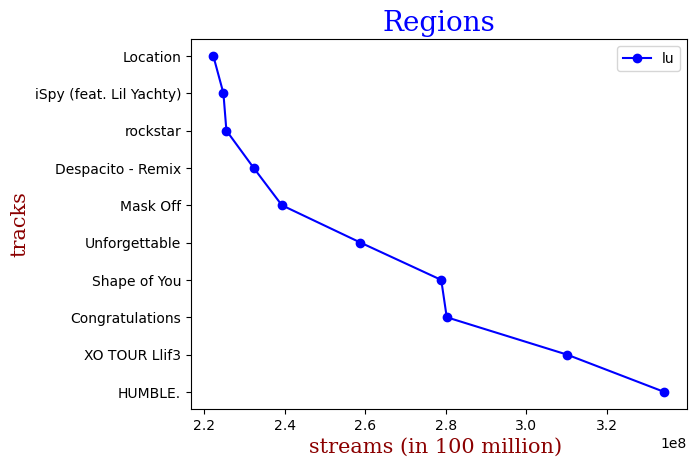

In [258]:
region_top_10_songs_graph('us')

code-name of track returns its regional distribution

## making model

target column is position

In [259]:
target='Position'

In [260]:
le = preprocessing.LabelEncoder()
data['Track Name']=le.fit_transform(data['Track Name'])
data['Artist']=le.fit_transform(data['Artist'])
data['Region']=le.fit_transform(data['Region'])

In [261]:
data.drop(columns=['Track Name', 'Artist'],inplace=True)

In [263]:
x = (data[[z for z in data.columns.tolist() if z not in [target]]]).copy()
y = data[target].copy()
x.shape, y.shape

train_x,x1,train_y,y1 = train_test_split(x,y,test_size=0.4,random_state= r, stratify=y).copy()
test_x,val_x,test_y,val_y= train_test_split(x1, y1, test_size=0.5,random_state=r, stratify=y1).copy()

# Modelling

In [264]:
data.dtypes

Position        int64
Streams         int64
Region          int32
Year            int64
Month           int64
Day Of Month    int64
Day Of Year     int64
Day Of Week     int64
dtype: object

In [265]:
data.head()

,Position,Streams,Region,Year,Month,Day Of Month,Day Of Year,Day Of Week
0,1,19272,15,2017,1,1,1,6
1,2,19270,15,2017,1,1,1,6
2,3,15761,15,2017,1,1,1,6
3,4,14954,15,2017,1,1,1,6
4,5,14269,15,2017,1,1,1,6


In [266]:
dt=dtr(random_state=r)

# xgboost model

In [267]:
import xgboost as xgb
from xgboost import XGBRegressor as xgbr

In [268]:
xgbm=xgbr(random_state=r,verbosity=0)

In [269]:
xgbmmodel = xgbm
xgbmmodel.fit(train_x,train_y)
pred=xgbmmodel.predict(val_x)
predtr=xgbmmodel.predict(train_x)
predt=xgbmmodel.predict(test_x)
[rmse(test_y, predt,squared=True),rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

[120.14416988217695, 120.0958934582372, 118.28101957176413]

In [270]:
params={'learning_rate':0.03,'subsample':1,'colsample_bylevel':0.9,'colsample_bynode':0.9,'colsample_bytree':0.9}

In [271]:
dtrain = xgb.DMatrix(train_x, label=train_y, enable_categorical=True)
dval = xgb.DMatrix(val_x, label=val_y, enable_categorical=True)
watchlist = [(dtrain, 'train'), (dval, 'val')]
xgbmodel = xgb.train(dtrain=dtrain,num_boost_round=1500,evals=watchlist, early_stopping_rounds=1,
      maximize=False, verbose_eval=10 ,params=params)
xbgmpredict={'ntree_limit':xgbmodel.best_ntree_limit}
print('Modeling RMSE %.5f' % xgbmodel.best_score)

[0]	train-rmse:107.61221	val-rmse:107.61232
[10]	train-rmse:85.90392	val-rmse:85.90513
[20]	train-rmse:71.06381	val-rmse:71.06520
[30]	train-rmse:60.94815	val-rmse:60.95422
[40]	train-rmse:54.20910	val-rmse:54.22194
[50]	train-rmse:49.41643	val-rmse:49.43509
[60]	train-rmse:46.63872	val-rmse:46.66797
[70]	train-rmse:44.36962	val-rmse:44.40109
[80]	train-rmse:42.37107	val-rmse:42.40395
[90]	train-rmse:41.05397	val-rmse:41.08629
[100]	train-rmse:39.61669	val-rmse:39.64675
[110]	train-rmse:38.30465	val-rmse:38.33564
[120]	train-rmse:37.06266	val-rmse:37.09355
[130]	train-rmse:36.52491	val-rmse:36.55676
[140]	train-rmse:35.65719	val-rmse:35.68834
[150]	train-rmse:34.43434	val-rmse:34.46590
[160]	train-rmse:34.03452	val-rmse:34.06723
[170]	train-rmse:33.35469	val-rmse:33.38692
[180]	train-rmse:32.96759	val-rmse:32.99996
[190]	train-rmse:32.14127	val-rmse:32.17533
[200]	train-rmse:31.15602	val-rmse:31.19136
[210]	train-rmse:30.63225	val-rmse:30.66958
[220]	train-rmse:29.86135	val-rmse:29.897

In [272]:
xgbmodel.best_score

9.15246

In [273]:
xbgmpredict

{'ntree_limit': 1500}

In [275]:
# save the model to the current directory for later use


# write
pkl_filename = "xgbbestmodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbmmodel, file)


# Load from file
with open(pkl_filename, 'rb') as file:
    xgbm_best_model = pickle.load(file)
    
# Calculate MSE values from saved model
pred=xgbm_best_model.predict(val_x)
predtr=xgbm_best_model.predict(train_x)
predt=xgbm_best_model.predict(test_x)
[rmse(test_y, predt,squared=True),rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

# Parameters of the model
xgbm_best_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 6,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

# random forest model

In [276]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestRegressor as rtr

In [277]:
rt=rtr(random_state=r,warm_start=False,criterion='entropy')

In [280]:
rtmodel=rtr()
rtmodel.fit(train_x,train_y)
pred=rtmodel.predict(test_x)
predt=rtmodel.predict(val_x)
predtr=rtmodel.predict(train_x)
[rmse(test_y, pred,squared=True),rmse(val_y, predt,squared=True),rmse(train_y, predtr,squared=True)]

[3.9329973336189674, 3.8908278820978697, 0.57031122465252]

In [282]:
print('Classification accuracy on training set: {:.3f}'.format(rtmodel.score(train_x, train_y)))
print('Classification accuracy on test set: {:.3f}'.format(rtmodel.score(test_x, test_y)))
rt.get_params()


Classification accuracy on training set: 1.000
Classification accuracy on test set: 0.999


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 6,
 'verbose': 0,
 'warm_start': False}

In [283]:
#save base random forest for later
# write
pkl_filename = "rfbasemodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rtmodel, file)


# Load from file
with open(pkl_filename, 'rb') as file:
    rf_model = pickle.load(file)
    
# Calculate MSE values from saved model
pred=rf_model.predict(val_x)
predtr=rf_model.predict(train_x)
predt=rf_model.predict(test_x)
[rmse(test_y, predt,squared=True),rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

# Parameters of the model
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [284]:
rf_model.feature_importances_

array([0.41085944, 0.51059066, 0.        , 0.00347912, 0.00490797,
       0.05546024, 0.01470257])

## decision tree

In [206]:
dtmodel = dtr(random_state=r,criterion='entropy')
dtmodel.fit(train_x,train_y)
pred=dtmodel.predict(val_x)
predtr=dtmodel.predict(train_x)
[rmse(val_y, pred,squared=True),rmse(train_y, predtr,squared=True)]

[9.202075546713889, 0.004133207462758321]

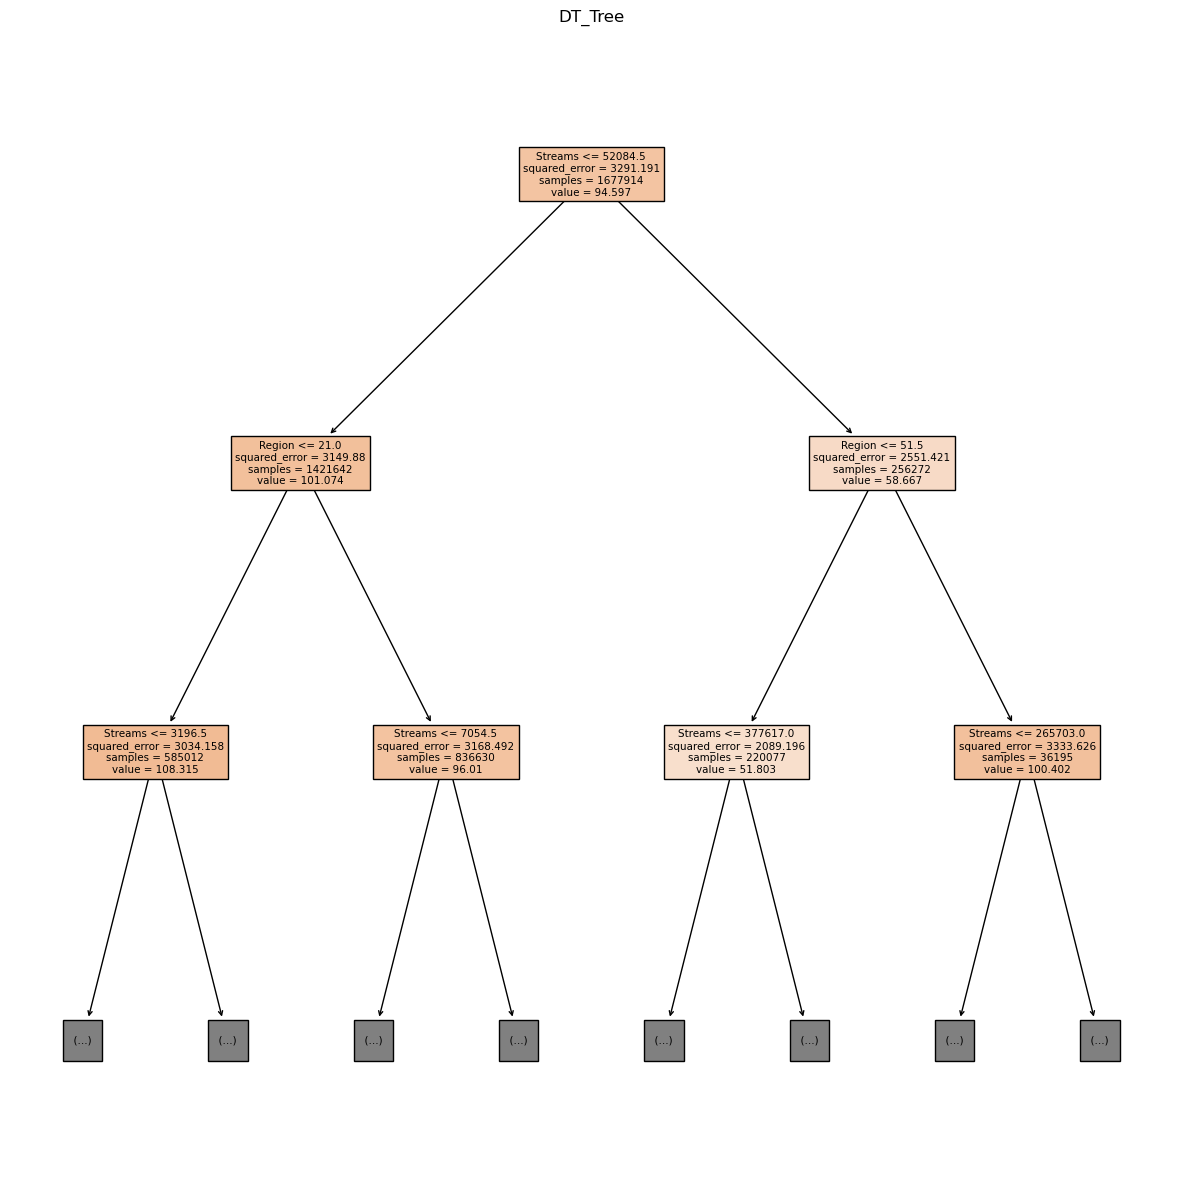

In [217]:
from sklearn.tree import plot_tree
dtmodel.fit(train_x,train_y)
plt.figure(figsize=(15,15))
plot_tree(dtmodel, feature_names=train_x.columns, filled=True, max_depth=2)
plt.title('DT_Tree')
plt.show()